## Machine Learning for Time Series Data in Python

### CHAPTER 1. Time Series and Machine Learning Primer

#### 1.1 Timeseries kinds and applications

* Time series means data that change over time
* It consists of two things:
    1. An array of numbers that represent data itself
    2. Another array that contains a timestamp for each datapoint
* Use 'plot' method to plot a pandas timeseries data

Why machine learning?
* We can use really big and complicated data and learn the patterns
* We can predict the future

Machine learning and timeseries data pipeline
* Feature extraction
* Model fitting
* Prediction and validation

   data_values
0   214.009998
1   214.379993
2   210.969995
3   210.580000
4   211.980005
   data_values
0    -0.006970
1    -0.007953
2    -0.008903
3    -0.009798
4    -0.010617


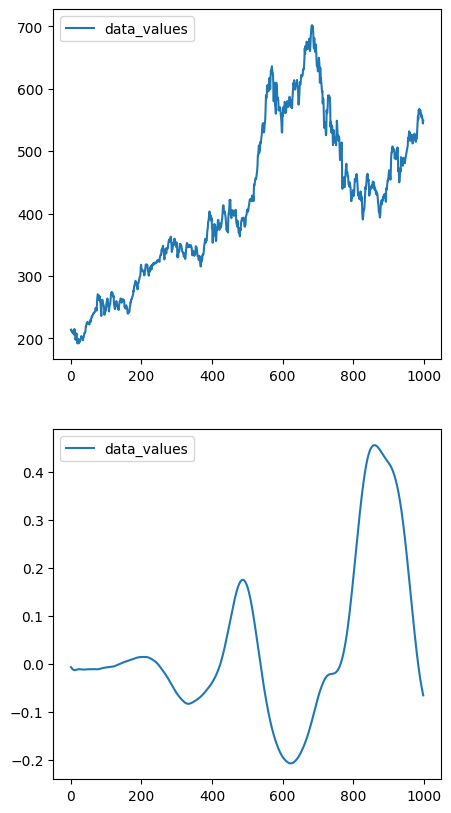

In [159]:
# plotting time series (PART I)
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# get data
prices = pd.read_csv('9_datasets/prices.csv')
data1 = prices[prices['symbol']=='AAPL']['close'].reset_index()
data1 = data1.drop('index', axis=1)
data1.columns=['data_values']

data2 = [-0.006969843525439501, -0.007952902466058731, -0.008903459645807743, -0.009798352606594563, -0.010616515763103962, -0.011340003460645676, -0.011954753659665585, -0.012451224029064178, -0.01282479427754879, -0.013075812719762325, -0.013209492899477482, -0.013235514983534813, -0.013167372904717922, -0.013021581806242466, -0.012816701084375381, -0.012572313658893108, -0.012307990342378616, -0.012042277492582798, -0.011791798286139965, -0.011570518836379051, -0.01138916052877903, -0.011254891753196716, -0.011171218939125538, -0.011138049885630608, -0.011152053251862526, -0.011207137256860733, -0.011295061558485031, -0.011406184174120426, -0.0115301962941885, -0.011656871065497398, -0.011776749975979328, -0.011881713755428791, -0.011965455487370491, -0.012023726478219032, -0.012054483406245708, -0.012057826854288578, -0.012035825289785862, -0.011992150917649269, -0.011931713670492172, -0.011860133148729801, -0.011783263646066189, -0.011706703342497349, -0.011635394766926765, -0.0115732466802001, -0.01152291614562273, -0.011485704220831394, -0.011461532674729824, -0.011449089273810387, -0.011446037329733372, -0.011449296958744526, -0.011455396190285683, -0.011460858397185802, -0.011462492868304253, -0.011457755230367184, -0.011444938369095325, -0.011423380114138126, -0.011393466964364052, -0.01135662104934454, -0.011315174400806427, -0.011272117495536804, -0.011230852454900742, -0.011194849386811256, -0.011167343705892563, -0.011150991544127464, -0.01114762481302023, -0.011158009991049767, -0.011181741021573544, -0.011217181570827961, -0.011261539533734322, -0.011310956440865993, -0.011360818520188332, -0.011405935510993004, -0.011440948583185673, -0.011460607871413231, -0.011460174806416035, -0.01143566519021988, -0.011384151875972748, -0.011303910054266453, -0.01119453739374876, -0.011056967079639435, -0.01089339517056942, -0.010707118548452854, -0.010502327233552933, -0.010283825919032097, -0.010056761093437672, -0.00982631091028452, -0.009597375988960266, -0.009374359622597694, -0.009160934016108513, -0.008959902450442314, -0.00877312757074833, -0.008601504378020763, -0.008445044979453087, -0.0083029605448246, -0.008173861540853977, -0.00805590022355318, -0.007947034202516079, -0.007845147512853146, -0.007748290430754423, -0.007654791697859764, -0.007563380058854818, -0.007473208010196686, -0.007383852265775204, -0.00729528209194541, -0.007207769900560379, -0.007121773436665535, -0.007037781178951263, -0.006956190336495638, -0.0068771555088460445, -0.006800487171858549, -0.006725572515279055, -0.006651308387517929, -0.006576104089617729, -0.0064979433082044125, -0.006414448376744986, -0.006323016714304686, -0.006220942363142967, -0.006105579435825348, -0.005974496249109507, -0.005825623869895935, -0.005657388363033533, -0.005468782503157854, -0.005259419791400433, -0.005029582884162664, -0.004780169110745192, -0.004512649495154619, -0.004228961654007435, -0.003931396175175905, -0.0036224524956196547, -0.0033047122415155172, -0.0029807088430970907, -0.002652780618518591, -0.002322975778952241, -0.001993001438677311, -0.001664179959334433, -0.001337438472546637, -0.001013335888274014, -0.0006921053281985223, -0.0003737312799785286, -5.8022378652822226e-05, 0.0002552849764470011, 0.000566476141102612, 0.0008757892064750195, 0.001183335785754025, 0.0014890804886817932, 0.001792827737517655, 0.002094237133860588, 0.0023928529117256403, 0.0026881499215960503, 0.002979591256007552, 0.003266678424552083, 0.003549037268385291, 0.0038264680188149214, 0.004098967649042606, 0.004366748966276646, 0.004630249459296465, 0.00489012198522687, 0.005147179588675499, 0.005402369890362024, 0.005656684283167124, 0.0059111095033586025, 0.006166553590446711, 0.006423812359571457, 0.0066834911704063416, 0.006945970002561808, 0.007211401127278805, 0.007479694671928883, 0.007750542834401131, 0.008023466914892197, 0.008297836408019066, 0.008572916500270367, 0.008847975172102451, 0.009122285060584545, 0.009395158849656582, 0.009666016325354576, 0.009934359230101109, 0.010199790820479393, 0.010461990721523762, 0.010720670223236084, 0.010975554585456848, 0.011226308532059193, 0.01147251483052969, 0.011713636107742786, 0.011948961764574051, 0.012177614495158195, 0.012398538179695606, 0.012610545381903648, 0.01281234435737133, 0.013002607971429825, 0.013180055655539036, 0.01334353443235159, 0.013492103666067123, 0.013625119812786579, 0.01374230906367302, 0.013843807391822338, 0.013930161483585835, 0.014002339914441109, 0.014061697758734226, 0.014109878800809383, 0.014148742891848087, 0.014180217869579792, 0.014206183142960072, 0.014228325337171555, 0.01424799207597971, 0.014266063459217548, 0.014282852411270142, 0.014298034831881523, 0.014310626313090324, 0.014318974688649178, 0.014320817776024342, 0.01431338395923376, 0.014293509535491467, 0.01425783522427082, 0.014202912338078022, 0.0141254598274827, 0.014022517018020153, 0.013891603797674179, 0.01373087614774704, 0.013539212755858898, 0.013316301628947258, 0.01306260097771883, 0.012779347598552704, 0.01246845442801714, 0.012132375501096249, 0.011773919686675072, 0.011396101675927639, 0.01100190356373787, 0.010594101622700691, 0.01017504371702671, 0.009746525436639786, 0.009309633634984493, 0.008864672854542732, 0.008411169983446598, 0.007947842590510845, 0.007472694385796785, 0.0069831437431275845, 0.0064761703833937645, 0.005948488134890795, 0.005396760534495115, 0.004817801062017679, 0.004208757542073727, 0.0035672998055815697, 0.0028917482122778893, 0.0021811758633702993, 0.0014354658778756857, 0.0006553070270456374, -0.00015784215065650642, -0.0010018463945016265, -0.0018740162486210465, -0.0027712644077837467, -0.003690282814204693, -0.0046277130022645, -0.0055803293362259865, -0.0065451995469629765, -0.007519813254475594, -0.008502190001308918, -0.009490938857197762, -0.010485285893082619, -0.011485062539577484, -0.012490631081163883, -0.013502828776836395, -0.014522832818329334, -0.015552057884633541, -0.0165919940918684, -0.017644120380282402, -0.018709750846028328, -0.019789952784776688, -0.020885499194264412, -0.021996784955263138, -0.02312386780977249, -0.02426641806960106, -0.025423860177397728, -0.026595309376716614, -0.02777978964149952, -0.028976233676075935, -0.030183574184775352, -0.03140084818005562, -0.032627228647470474, -0.033862072974443436, -0.03510497882962227, -0.03635562211275101, -0.03761390969157219, -0.03887977451086044, -0.04015316814184189, -0.041433919221162796, -0.0427217036485672, -0.044015832245349884, -0.04531529173254967, -0.04661860689520836, -0.047923874109983444, -0.04922868311405182, -0.05053018033504486, -0.051825109869241714, -0.0531100369989872, -0.05438120290637016, -0.05563488230109215, -0.056867506355047226, -0.05807573348283768, -0.05925658717751503, -0.060407742857933044, -0.06152743473649025, -0.06261463463306427, -0.06366916000843048, -0.06469137221574783, -0.06568249315023422, -0.06664425879716873, -0.06757901608943939, -0.0684892013669014, -0.06937756389379501, -0.07024683803319931, -0.07109934091567993, -0.0719371810555458, -0.07276184856891632, -0.07357412576675415, -0.07437396049499512, -0.07516057044267654, -0.0759323462843895, -0.07668673247098923, -0.07742071151733398, -0.07813037931919098, -0.07881157100200653, -0.0794597715139389, -0.08007032424211502, -0.08063872903585434, -0.08116075396537781, -0.08163250237703323, -0.08205077797174454, -0.08241289854049683, -0.08271712809801102, -0.08296241611242294, -0.08314850181341171, -0.08327591419219971, -0.08334612846374512, -0.08336102962493896, -0.08332307636737823, -0.08323535323143005, -0.08310102671384811, -0.08292367309331894, -0.08270672708749771, -0.08245393633842468, -0.08216861635446548, -0.0818541944026947, -0.08151374012231827, -0.08115013688802719, -0.08076605945825577, -0.08036381006240845, -0.0799456536769867, -0.07951334863901138, -0.07906867563724518, -0.07861322164535522, -0.07814817130565643, -0.07767457515001297, -0.07719365507364273, -0.07670603692531586, -0.0762123242020607, -0.07571301609277725, -0.0752081573009491, -0.07469765841960907, -0.07418119162321091, -0.07365802675485611, -0.07312728464603424, -0.0725877434015274, -0.07203804701566696, -0.07147658616304398, -0.07090158760547638, -0.07031130790710449, -0.06970391422510147, -0.06907770037651062, -0.06843104213476181, -0.06776271015405655, -0.0670715719461441, -0.0663570687174797, -0.06561893224716187, -0.06485734134912491, -0.06407298892736435, -0.06326692551374435, -0.06244063004851341, -0.06159583851695061, -0.06073455512523651, -0.05985897779464722, -0.05897130072116852, -0.05807364732027054, -0.05716809630393982, -0.05625639855861664, -0.05533996596932411, -0.05441979691386223, -0.053496409207582474, -0.05256979912519455, -0.051639385521411896, -0.05070418864488602, -0.04976261407136917, -0.04881269857287407, -0.047852154821157455, -0.04687836393713951, -0.04588853940367699, -0.044879794120788574, -0.043849244713783264, -0.04279410094022751, -0.041711702942848206, -0.04059965908527374, -0.03945586457848549, -0.03827839717268944, -0.03706580400466919, -0.03581683337688446, -0.034530527889728546, -0.03320617228746414, -0.03184308111667633, -0.030440744012594223, -0.028998618945479393, -0.02751609869301319, -0.02599235624074936, -0.024426385760307312, -0.022816931828856468, -0.021162424236536026, -0.019460922107100487, -0.01771015301346779, -0.01590757817029953, -0.014050310477614403, -0.01213528960943222, -0.010159285739064217, -0.008118986152112484, -0.006011120043694973, -0.0038326045032590628, -0.0015805383445695043, 0.000747643003705889, 0.0031540850177407265, 0.0056404476054012775, 0.008207831531763077, 0.010856736451387405, 0.013587037101387978, 0.016397980973124504, 0.019288184121251106, 0.02225562371313572, 0.02529769577085972, 0.028411362320184708, 0.031593065708875656, 0.03483891487121582, 0.03814474120736122, 0.04150610789656639, 0.044918518513441086, 0.04837728664278984, 0.05187787115573883, 0.05541561543941498, 0.058985963463783264, 0.06258455663919449, 0.06620699912309647, 0.06984919309616089, 0.07350697368383408, 0.07717640697956085, 0.08085354417562485, 0.08453439921140671, 0.08821514248847961, 0.09189169108867645, 0.09555979818105698, 0.09921526163816452, 0.10285355150699615, 0.10646987706422806, 0.11005926132202148, 0.1136162206530571, 0.11713528633117676, 0.12061043083667755, 0.12403544783592224, 0.1274038553237915, 0.1307087391614914, 0.1339433342218399, 0.13710051774978638, 0.1401730626821518, 0.1431540697813034, 0.14603619277477264, 0.1488126814365387, 0.15147684514522552, 0.15402238070964813, 0.15644314885139465, 0.15873372554779053, 0.1608888804912567, 0.16290384531021118, 0.16477492451667786, 0.16649803519248962, 0.16807040572166443, 0.1694892942905426, 0.1707523763179779, 0.17185774445533752, 0.17280395328998566, 0.17358961701393127, 0.17421336472034454, 0.17467424273490906, 0.1749710738658905, 0.1751028448343277, 0.1750684380531311, 0.17486673593521118, 0.1744963824748993, 0.17395634949207306, 0.17324523627758026, 0.17236198484897614, 0.17130543291568756, 0.17007480561733246, 0.1686692237854004, 0.16708862781524658, 0.16533292829990387, 0.16340264678001404, 0.1612987518310547, 0.15902268886566162, 0.15657630562782288, 0.15396235883235931, 0.15118364989757538, 0.1482437252998352, 0.14514636993408203, 0.14189566671848297, 0.13849623501300812, 0.13495275378227234, 0.13127009570598602, 0.12745319306850433, 0.12350741028785706, 0.11943776905536652, 0.11524970829486847, 0.1109485775232315, 0.10653993487358093, 0.10202929377555847, 0.09742264449596405, 0.0927259624004364, 0.08794556558132172, 0.08308792114257812, 0.07816005498170853, 0.07316907495260239, 0.06812231242656708, 0.06302756071090698, 0.05789267644286156, 0.052725620567798615, 0.04753440245985985, 0.042326997965574265, 0.03711116313934326, 0.03189440816640854, 0.02668387070298195, 0.02148626558482647, 0.016307726502418518, 0.011153830215334892, 0.006029551383107901, 0.0009392463252879679, -0.004113342612981796, -0.00912502035498619, -0.014093099161982536, -0.019015314057469368, -0.023889727890491486, -0.028714654967188835, -0.03348856046795845, -0.038209978491067886, -0.042877454310655594, -0.047489456832408905, -0.052044373005628586, -0.056540410965681076, -0.06097571924328804, -0.06534827500581741, -0.06965593993663788, -0.0738966166973114, -0.07806801050901413, -0.08216818422079086, -0.08619511127471924, -0.09014693647623062, -0.09402209520339966, -0.0978192687034607, -0.10153736174106598, -0.1051756739616394, -0.10873371362686157, -0.11221137642860413, -0.11560867726802826, -0.11892612278461456, -0.12216430902481079, -0.1253240406513214, -0.12840652465820312, -0.13141269981861115, -0.134344220161438, -0.13720236718654633, -0.1399887204170227, -0.1427050232887268, -0.1453530341386795, -0.1479344367980957, -0.15045106410980225, -0.15290477871894836, -0.1552973836660385, -0.1576305329799652, -0.15990592539310455, -0.16212491691112518, -0.164288729429245, -0.16639845073223114, -0.16845472157001495, -0.1704578548669815, -0.17240801453590393, -0.1743048131465912, -0.17614780366420746, -0.17793604731559753, -0.17966866493225098, -0.18134449422359467, -0.18296247720718384, -0.18452133238315582, -0.18602026998996735, -0.18745875358581543, -0.18883638083934784, -0.1901533156633377, -0.19141043722629547, -0.1926087886095047, -0.1937500387430191, -0.19483642280101776, -0.19587016105651855, -0.19685405492782593, -0.1977909356355667, -0.19868355989456177, -0.19953449070453644, -0.2003459632396698, -0.20111988484859467, -0.201857328414917, -0.202558696269989, -0.2032240927219391, -0.20385216176509857, -0.2044413983821869, -0.20498934388160706, -0.20549322664737701, -0.2059497982263565, -0.20635555684566498, -0.20670723915100098, -0.20700129866600037, -0.20723502337932587, -0.2074059396982193, -0.20751219987869263, -0.20755255222320557, -0.20752672851085663, -0.20743504166603088, -0.2072785198688507, -0.20705869793891907, -0.20677778124809265, -0.20643815398216248, -0.20604240894317627, -0.20559312403202057, -0.20509257912635803, -0.20454297959804535, -0.2039456069469452, -0.20330190658569336, -0.20261240005493164, -0.2018771767616272, -0.201095849275589, -0.20026767253875732, -0.19939182698726654, -0.19846712052822113, -0.1974923312664032, -0.19646690785884857, -0.19538986682891846, -0.19426117837429047, -0.1930811107158661, -0.19185037910938263, -0.19057025015354156, -0.1892424374818802, -0.18786895275115967, -0.18645215034484863, -0.18499422073364258, -0.1834973841905594, -0.18196389079093933, -0.18039512634277344, -0.17879250645637512, -0.17715641856193542, -0.17548708617687225, -0.17378370463848114, -0.17204499244689941, -0.17026935517787933, -0.16845472157001495, -0.16659824550151825, -0.16469769179821014, -0.1627504676580429, -0.16075442731380463, -0.15870755910873413, -0.1566086709499359, -0.15445682406425476, -0.15225185453891754, -0.14999431371688843, -0.14768515527248383, -0.1453259140253067, -0.1429188847541809, -0.14046619832515717, -0.1379704475402832, -0.1354343593120575, -0.13286051154136658, -0.13025127351284027, -0.12760937213897705, -0.12493647634983063, -0.12223482877016068, -0.11950605362653732, -0.11675196141004562, -0.1139741986989975, -0.11117482930421829, -0.10835609585046768, -0.10552054643630981, -0.10267144441604614, -0.0998125821352005, -0.09694837033748627, -0.094083771109581, -0.09122445434331894, -0.08837645500898361, -0.08554624021053314, -0.08274051547050476, -0.07996580749750137, -0.0772286206483841, -0.07453489303588867, -0.07189017534255981, -0.06929906457662582, -0.06676535308361053, -0.06429200619459152, -0.06188094988465309, -0.059533290565013885, -0.05724930018186569, -0.055028654634952545, -0.052870530635118484, -0.050773926079273224, -0.048737846314907074, -0.04676143079996109, -0.04484422877430916, -0.04298641160130501, -0.041188795119524, -0.03945304825901985, -0.03778156638145447, -0.036177415400743484, -0.03464436158537865, -0.03318655118346214, -0.031808339059352875, -0.030514108017086983, -0.029307860881090164, -0.02819303795695305, -0.027172328904271126, -0.026247290894389153, -0.0254183541983366, -0.024684539064764977, -0.024043472483754158, -0.02349139004945755, -0.02302313968539238, -0.022632364183664322, -0.022311540320515633, -0.022052329033613205, -0.02184569649398327, -0.021682213991880417, -0.02155221626162529, -0.021446112543344498, -0.021354496479034424, -0.02126832865178585, -0.021179040893912315, -0.021078629419207573, -0.020959557965397835, -0.02081487514078617, -0.02063809521496296, -0.020423119887709618, -0.020164109766483307, -0.019855443388223648, -0.01949159801006317, -0.01906699128448963, -0.01857605203986168, -0.01801304519176483, -0.017372144386172295, -0.016647422686219215, -0.01583292707800865, -0.014922693371772766, -0.013910908252000809, -0.012791940942406654, -0.011560442857444286, -0.010211430490016937, -0.008740379475057125, -0.0071431854739785194, -0.00541623355820775, -0.003556350013241172, -0.0015607619425281882, 0.0005729723488911986, 0.0028470722027122974, 0.005263622850179672, 0.007824704982340336, 0.010532482527196407, 0.013389293104410172, 0.01639772765338421, 0.019560635089874268, 0.022881165146827698, 0.026362694799900055, 0.03000873513519764, 0.03382287174463272, 0.03780856356024742, 0.04196910187602043, 0.04630722105503082, 0.050825104117393494, 0.055524226278066635, 0.06040498986840248, 0.06546693295240402, 0.07070833444595337, 0.07612625509500504, 0.08171677589416504, 0.08747473359107971, 0.09339392185211182, 0.0994672179222107, 0.10568686574697495, 0.11204437166452408, 0.11853088438510895, 0.12513737380504608, 0.1318545788526535, 0.1386738419532776, 0.14558611810207367, 0.15258300304412842, 0.15965642035007477, 0.16679872572422028, 0.17400258779525757, 0.1812608689069748, 0.18856705725193024, 0.19591432809829712, 0.20329596102237701, 0.21070554852485657, 0.21813605725765228, 0.22558028995990753, 0.23303081095218658, 0.24047979712486267, 0.24791871011257172, 0.2553390860557556, 0.262731671333313, 0.2700870931148529, 0.2773955166339874, 0.28464776277542114, 0.29183313250541687, 0.29894259572029114, 0.30596640706062317, 0.31289535760879517, 0.31972038745880127, 0.3264332115650177, 0.33302563428878784, 0.33949002623558044, 0.3458196222782135, 0.35200726985931396, 0.3580472469329834, 0.3639333248138428, 0.3696603775024414, 0.3752231299877167, 0.38061678409576416, 0.38583648204803467, 0.39087826013565063, 0.3957376778125763, 0.40041112899780273, 0.40489473938941956, 0.4091857671737671, 0.41328099370002747, 0.417178213596344, 0.4208754003047943, 0.424371600151062, 0.4276657700538635, 0.4307584762573242, 0.43365001678466797, 0.4363420605659485, 0.4388367235660553, 0.4411371946334839, 0.4432467520236969, 0.4451698362827301, 0.446911484003067, 0.44847652316093445, 0.4498709440231323, 0.4511011838912964, 0.45217254757881165, 0.45309215784072876, 0.45386603474617004, 0.45450088381767273, 0.4550025761127472, 0.4553772509098053, 0.45563092827796936, 0.45576876401901245, 0.4557967185974121, 0.45571935176849365, 0.45554184913635254, 0.4552687108516693, 0.4549042582511902, 0.45445308089256287, 0.4539192318916321, 0.4533071517944336, 0.45262131094932556, 0.45186594128608704, 0.4510456621646881, 0.450165331363678, 0.44922998547554016, 0.44824469089508057, 0.44721534848213196, 0.44614729285240173, 0.44504687190055847, 0.44391968846321106, 0.44277223944664, 0.4416104257106781, 0.4404403567314148, 0.43926742672920227, 0.43809789419174194, 0.43693509697914124, 0.43578463792800903, 0.4346493184566498, 0.4335324764251709, 0.4324353039264679, 0.4313589632511139, 0.4303033947944641, 0.4292677640914917, 0.4282492995262146, 0.4272455871105194, 0.426252543926239, 0.42526543140411377, 0.42427903413772583, 0.423287570476532, 0.4222845733165741, 0.4212639331817627, 0.42021888494491577, 0.41914212703704834, 0.4180282652378082, 0.41687023639678955, 0.4156619608402252, 0.414398193359375, 0.41307303309440613, 0.41168174147605896, 0.4102192223072052, 0.4086814820766449, 0.4070642292499542, 0.4053634703159332, 0.40357527136802673, 0.401696115732193, 0.39972206950187683, 0.3976496756076813, 0.39547523856163025, 0.3931947350502014, 0.3908046782016754, 0.38830119371414185, 0.3856804668903351, 0.3829386830329895, 0.38007211685180664, 0.37707751989364624, 0.37395116686820984, 0.3706900179386139, 0.36729133129119873, 0.3637523651123047, 0.3600708544254303, 0.3562448024749756, 0.352272629737854, 0.34815308451652527, 0.34388479590415955, 0.33946752548217773, 0.33490023016929626, 0.3301829695701599, 0.3253156244754791, 0.320298433303833, 0.3151317536830902, 0.3098165988922119, 0.3043536841869354, 0.2987445294857025, 0.2929907739162445, 0.28709477186203003, 0.2810593247413635, 0.2748875319957733, 0.268583208322525, 0.26215094327926636, 0.2555955946445465, 0.2489234209060669, 0.24214066565036774, 0.23525427281856537, 0.22827205061912537, 0.2212017923593521, 0.21405205130577087, 0.20683160424232483, 0.19954928755760193, 0.19221411645412445, 0.18483512103557587, 0.1774211823940277, 0.1699809581041336, 0.1625230312347412, 0.15505532920360565, 0.14758583903312683, 0.14012202620506287, 0.13267125189304352, 0.1252404898405075, 0.11783644556999207, 0.11046601831912994, 0.10313578695058823, 0.09585247188806534, 0.08862287551164627, 0.08145377784967422, 0.07435236126184464, 0.06732579320669174, 0.06038156896829605, 0.053527217358350754, 0.04677052050828934, 0.0401192381978035, 0.033581141382455826, 0.0271637961268425, 0.020874636247754097, 0.014720611274242401, 0.008708249777555466, 0.002843494527041912, -0.002868387382477522, -0.008422906510531902, -0.013816401362419128, -0.019046086817979813, -0.024110108613967896, -0.029007460922002792, -0.03373805433511734, -0.03830267861485481, -0.04270290955901146, -0.046940941363573074, -0.05101972445845604, -0.05494258552789688, -0.058713398873806, -0.062336359173059464, -0.06581586599349976]

data2 = pd.DataFrame({'data_values':data2})

# print data
print(data1.head())
print(data2.head())

# plot time series data
fig, axs = plt.subplots(2, 1, figsize=(5, 10))
data1.iloc[:1000].plot(y='data_values', ax=axs[0])
data2.iloc[:1000].plot(y='data_values', ax=axs[1])
plt.show()

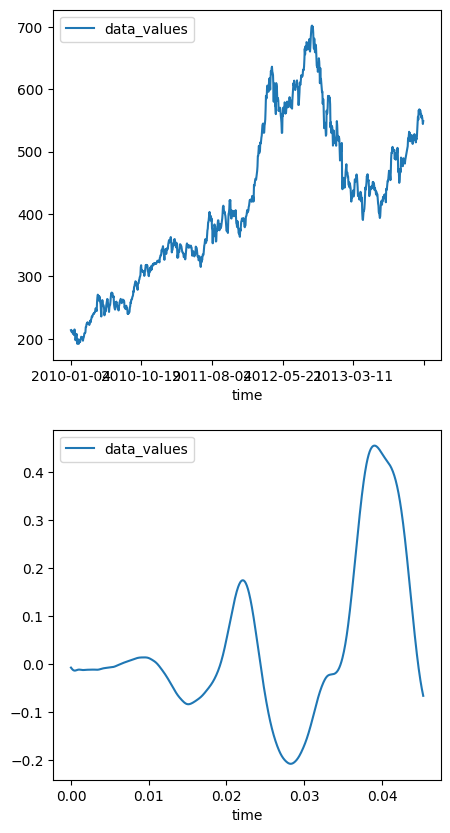

In [160]:
# plotting a time series (PART II)
# this time, with 'time' column
data1 = prices[prices['symbol']=='AAPL'][['date', 'close']].reset_index()
data1 = data1.drop('index', axis=1)
data1.columns=['time', 'data_values']

data_values = [-0.006969843525439501, -0.007952902466058731, -0.008903459645807743, -0.009798352606594563, -0.010616515763103962, -0.011340003460645676, -0.011954753659665585, -0.012451224029064178, -0.01282479427754879, -0.013075812719762325, -0.013209492899477482, -0.013235514983534813, -0.013167372904717922, -0.013021581806242466, -0.012816701084375381, -0.012572313658893108, -0.012307990342378616, -0.012042277492582798, -0.011791798286139965, -0.011570518836379051, -0.01138916052877903, -0.011254891753196716, -0.011171218939125538, -0.011138049885630608, -0.011152053251862526, -0.011207137256860733, -0.011295061558485031, -0.011406184174120426, -0.0115301962941885, -0.011656871065497398, -0.011776749975979328, -0.011881713755428791, -0.011965455487370491, -0.012023726478219032, -0.012054483406245708, -0.012057826854288578, -0.012035825289785862, -0.011992150917649269, -0.011931713670492172, -0.011860133148729801, -0.011783263646066189, -0.011706703342497349, -0.011635394766926765, -0.0115732466802001, -0.01152291614562273, -0.011485704220831394, -0.011461532674729824, -0.011449089273810387, -0.011446037329733372, -0.011449296958744526, -0.011455396190285683, -0.011460858397185802, -0.011462492868304253, -0.011457755230367184, -0.011444938369095325, -0.011423380114138126, -0.011393466964364052, -0.01135662104934454, -0.011315174400806427, -0.011272117495536804, -0.011230852454900742, -0.011194849386811256, -0.011167343705892563, -0.011150991544127464, -0.01114762481302023, -0.011158009991049767, -0.011181741021573544, -0.011217181570827961, -0.011261539533734322, -0.011310956440865993, -0.011360818520188332, -0.011405935510993004, -0.011440948583185673, -0.011460607871413231, -0.011460174806416035, -0.01143566519021988, -0.011384151875972748, -0.011303910054266453, -0.01119453739374876, -0.011056967079639435, -0.01089339517056942, -0.010707118548452854, -0.010502327233552933, -0.010283825919032097, -0.010056761093437672, -0.00982631091028452, -0.009597375988960266, -0.009374359622597694, -0.009160934016108513, -0.008959902450442314, -0.00877312757074833, -0.008601504378020763, -0.008445044979453087, -0.0083029605448246, -0.008173861540853977, -0.00805590022355318, -0.007947034202516079, -0.007845147512853146, -0.007748290430754423, -0.007654791697859764, -0.007563380058854818, -0.007473208010196686, -0.007383852265775204, -0.00729528209194541, -0.007207769900560379, -0.007121773436665535, -0.007037781178951263, -0.006956190336495638, -0.0068771555088460445, -0.006800487171858549, -0.006725572515279055, -0.006651308387517929, -0.006576104089617729, -0.0064979433082044125, -0.006414448376744986, -0.006323016714304686, -0.006220942363142967, -0.006105579435825348, -0.005974496249109507, -0.005825623869895935, -0.005657388363033533, -0.005468782503157854, -0.005259419791400433, -0.005029582884162664, -0.004780169110745192, -0.004512649495154619, -0.004228961654007435, -0.003931396175175905, -0.0036224524956196547, -0.0033047122415155172, -0.0029807088430970907, -0.002652780618518591, -0.002322975778952241, -0.001993001438677311, -0.001664179959334433, -0.001337438472546637, -0.001013335888274014, -0.0006921053281985223, -0.0003737312799785286, -5.8022378652822226e-05, 0.0002552849764470011, 0.000566476141102612, 0.0008757892064750195, 0.001183335785754025, 0.0014890804886817932, 0.001792827737517655, 0.002094237133860588, 0.0023928529117256403, 0.0026881499215960503, 0.002979591256007552, 0.003266678424552083, 0.003549037268385291, 0.0038264680188149214, 0.004098967649042606, 0.004366748966276646, 0.004630249459296465, 0.00489012198522687, 0.005147179588675499, 0.005402369890362024, 0.005656684283167124, 0.0059111095033586025, 0.006166553590446711, 0.006423812359571457, 0.0066834911704063416, 0.006945970002561808, 0.007211401127278805, 0.007479694671928883, 0.007750542834401131, 0.008023466914892197, 0.008297836408019066, 0.008572916500270367, 0.008847975172102451, 0.009122285060584545, 0.009395158849656582, 0.009666016325354576, 0.009934359230101109, 0.010199790820479393, 0.010461990721523762, 0.010720670223236084, 0.010975554585456848, 0.011226308532059193, 0.01147251483052969, 0.011713636107742786, 0.011948961764574051, 0.012177614495158195, 0.012398538179695606, 0.012610545381903648, 0.01281234435737133, 0.013002607971429825, 0.013180055655539036, 0.01334353443235159, 0.013492103666067123, 0.013625119812786579, 0.01374230906367302, 0.013843807391822338, 0.013930161483585835, 0.014002339914441109, 0.014061697758734226, 0.014109878800809383, 0.014148742891848087, 0.014180217869579792, 0.014206183142960072, 0.014228325337171555, 0.01424799207597971, 0.014266063459217548, 0.014282852411270142, 0.014298034831881523, 0.014310626313090324, 0.014318974688649178, 0.014320817776024342, 0.01431338395923376, 0.014293509535491467, 0.01425783522427082, 0.014202912338078022, 0.0141254598274827, 0.014022517018020153, 0.013891603797674179, 0.01373087614774704, 0.013539212755858898, 0.013316301628947258, 0.01306260097771883, 0.012779347598552704, 0.01246845442801714, 0.012132375501096249, 0.011773919686675072, 0.011396101675927639, 0.01100190356373787, 0.010594101622700691, 0.01017504371702671, 0.009746525436639786, 0.009309633634984493, 0.008864672854542732, 0.008411169983446598, 0.007947842590510845, 0.007472694385796785, 0.0069831437431275845, 0.0064761703833937645, 0.005948488134890795, 0.005396760534495115, 0.004817801062017679, 0.004208757542073727, 0.0035672998055815697, 0.0028917482122778893, 0.0021811758633702993, 0.0014354658778756857, 0.0006553070270456374, -0.00015784215065650642, -0.0010018463945016265, -0.0018740162486210465, -0.0027712644077837467, -0.003690282814204693, -0.0046277130022645, -0.0055803293362259865, -0.0065451995469629765, -0.007519813254475594, -0.008502190001308918, -0.009490938857197762, -0.010485285893082619, -0.011485062539577484, -0.012490631081163883, -0.013502828776836395, -0.014522832818329334, -0.015552057884633541, -0.0165919940918684, -0.017644120380282402, -0.018709750846028328, -0.019789952784776688, -0.020885499194264412, -0.021996784955263138, -0.02312386780977249, -0.02426641806960106, -0.025423860177397728, -0.026595309376716614, -0.02777978964149952, -0.028976233676075935, -0.030183574184775352, -0.03140084818005562, -0.032627228647470474, -0.033862072974443436, -0.03510497882962227, -0.03635562211275101, -0.03761390969157219, -0.03887977451086044, -0.04015316814184189, -0.041433919221162796, -0.0427217036485672, -0.044015832245349884, -0.04531529173254967, -0.04661860689520836, -0.047923874109983444, -0.04922868311405182, -0.05053018033504486, -0.051825109869241714, -0.0531100369989872, -0.05438120290637016, -0.05563488230109215, -0.056867506355047226, -0.05807573348283768, -0.05925658717751503, -0.060407742857933044, -0.06152743473649025, -0.06261463463306427, -0.06366916000843048, -0.06469137221574783, -0.06568249315023422, -0.06664425879716873, -0.06757901608943939, -0.0684892013669014, -0.06937756389379501, -0.07024683803319931, -0.07109934091567993, -0.0719371810555458, -0.07276184856891632, -0.07357412576675415, -0.07437396049499512, -0.07516057044267654, -0.0759323462843895, -0.07668673247098923, -0.07742071151733398, -0.07813037931919098, -0.07881157100200653, -0.0794597715139389, -0.08007032424211502, -0.08063872903585434, -0.08116075396537781, -0.08163250237703323, -0.08205077797174454, -0.08241289854049683, -0.08271712809801102, -0.08296241611242294, -0.08314850181341171, -0.08327591419219971, -0.08334612846374512, -0.08336102962493896, -0.08332307636737823, -0.08323535323143005, -0.08310102671384811, -0.08292367309331894, -0.08270672708749771, -0.08245393633842468, -0.08216861635446548, -0.0818541944026947, -0.08151374012231827, -0.08115013688802719, -0.08076605945825577, -0.08036381006240845, -0.0799456536769867, -0.07951334863901138, -0.07906867563724518, -0.07861322164535522, -0.07814817130565643, -0.07767457515001297, -0.07719365507364273, -0.07670603692531586, -0.0762123242020607, -0.07571301609277725, -0.0752081573009491, -0.07469765841960907, -0.07418119162321091, -0.07365802675485611, -0.07312728464603424, -0.0725877434015274, -0.07203804701566696, -0.07147658616304398, -0.07090158760547638, -0.07031130790710449, -0.06970391422510147, -0.06907770037651062, -0.06843104213476181, -0.06776271015405655, -0.0670715719461441, -0.0663570687174797, -0.06561893224716187, -0.06485734134912491, -0.06407298892736435, -0.06326692551374435, -0.06244063004851341, -0.06159583851695061, -0.06073455512523651, -0.05985897779464722, -0.05897130072116852, -0.05807364732027054, -0.05716809630393982, -0.05625639855861664, -0.05533996596932411, -0.05441979691386223, -0.053496409207582474, -0.05256979912519455, -0.051639385521411896, -0.05070418864488602, -0.04976261407136917, -0.04881269857287407, -0.047852154821157455, -0.04687836393713951, -0.04588853940367699, -0.044879794120788574, -0.043849244713783264, -0.04279410094022751, -0.041711702942848206, -0.04059965908527374, -0.03945586457848549, -0.03827839717268944, -0.03706580400466919, -0.03581683337688446, -0.034530527889728546, -0.03320617228746414, -0.03184308111667633, -0.030440744012594223, -0.028998618945479393, -0.02751609869301319, -0.02599235624074936, -0.024426385760307312, -0.022816931828856468, -0.021162424236536026, -0.019460922107100487, -0.01771015301346779, -0.01590757817029953, -0.014050310477614403, -0.01213528960943222, -0.010159285739064217, -0.008118986152112484, -0.006011120043694973, -0.0038326045032590628, -0.0015805383445695043, 0.000747643003705889, 0.0031540850177407265, 0.0056404476054012775, 0.008207831531763077, 0.010856736451387405, 0.013587037101387978, 0.016397980973124504, 0.019288184121251106, 0.02225562371313572, 0.02529769577085972, 0.028411362320184708, 0.031593065708875656, 0.03483891487121582, 0.03814474120736122, 0.04150610789656639, 0.044918518513441086, 0.04837728664278984, 0.05187787115573883, 0.05541561543941498, 0.058985963463783264, 0.06258455663919449, 0.06620699912309647, 0.06984919309616089, 0.07350697368383408, 0.07717640697956085, 0.08085354417562485, 0.08453439921140671, 0.08821514248847961, 0.09189169108867645, 0.09555979818105698, 0.09921526163816452, 0.10285355150699615, 0.10646987706422806, 0.11005926132202148, 0.1136162206530571, 0.11713528633117676, 0.12061043083667755, 0.12403544783592224, 0.1274038553237915, 0.1307087391614914, 0.1339433342218399, 0.13710051774978638, 0.1401730626821518, 0.1431540697813034, 0.14603619277477264, 0.1488126814365387, 0.15147684514522552, 0.15402238070964813, 0.15644314885139465, 0.15873372554779053, 0.1608888804912567, 0.16290384531021118, 0.16477492451667786, 0.16649803519248962, 0.16807040572166443, 0.1694892942905426, 0.1707523763179779, 0.17185774445533752, 0.17280395328998566, 0.17358961701393127, 0.17421336472034454, 0.17467424273490906, 0.1749710738658905, 0.1751028448343277, 0.1750684380531311, 0.17486673593521118, 0.1744963824748993, 0.17395634949207306, 0.17324523627758026, 0.17236198484897614, 0.17130543291568756, 0.17007480561733246, 0.1686692237854004, 0.16708862781524658, 0.16533292829990387, 0.16340264678001404, 0.1612987518310547, 0.15902268886566162, 0.15657630562782288, 0.15396235883235931, 0.15118364989757538, 0.1482437252998352, 0.14514636993408203, 0.14189566671848297, 0.13849623501300812, 0.13495275378227234, 0.13127009570598602, 0.12745319306850433, 0.12350741028785706, 0.11943776905536652, 0.11524970829486847, 0.1109485775232315, 0.10653993487358093, 0.10202929377555847, 0.09742264449596405, 0.0927259624004364, 0.08794556558132172, 0.08308792114257812, 0.07816005498170853, 0.07316907495260239, 0.06812231242656708, 0.06302756071090698, 0.05789267644286156, 0.052725620567798615, 0.04753440245985985, 0.042326997965574265, 0.03711116313934326, 0.03189440816640854, 0.02668387070298195, 0.02148626558482647, 0.016307726502418518, 0.011153830215334892, 0.006029551383107901, 0.0009392463252879679, -0.004113342612981796, -0.00912502035498619, -0.014093099161982536, -0.019015314057469368, -0.023889727890491486, -0.028714654967188835, -0.03348856046795845, -0.038209978491067886, -0.042877454310655594, -0.047489456832408905, -0.052044373005628586, -0.056540410965681076, -0.06097571924328804, -0.06534827500581741, -0.06965593993663788, -0.0738966166973114, -0.07806801050901413, -0.08216818422079086, -0.08619511127471924, -0.09014693647623062, -0.09402209520339966, -0.0978192687034607, -0.10153736174106598, -0.1051756739616394, -0.10873371362686157, -0.11221137642860413, -0.11560867726802826, -0.11892612278461456, -0.12216430902481079, -0.1253240406513214, -0.12840652465820312, -0.13141269981861115, -0.134344220161438, -0.13720236718654633, -0.1399887204170227, -0.1427050232887268, -0.1453530341386795, -0.1479344367980957, -0.15045106410980225, -0.15290477871894836, -0.1552973836660385, -0.1576305329799652, -0.15990592539310455, -0.16212491691112518, -0.164288729429245, -0.16639845073223114, -0.16845472157001495, -0.1704578548669815, -0.17240801453590393, -0.1743048131465912, -0.17614780366420746, -0.17793604731559753, -0.17966866493225098, -0.18134449422359467, -0.18296247720718384, -0.18452133238315582, -0.18602026998996735, -0.18745875358581543, -0.18883638083934784, -0.1901533156633377, -0.19141043722629547, -0.1926087886095047, -0.1937500387430191, -0.19483642280101776, -0.19587016105651855, -0.19685405492782593, -0.1977909356355667, -0.19868355989456177, -0.19953449070453644, -0.2003459632396698, -0.20111988484859467, -0.201857328414917, -0.202558696269989, -0.2032240927219391, -0.20385216176509857, -0.2044413983821869, -0.20498934388160706, -0.20549322664737701, -0.2059497982263565, -0.20635555684566498, -0.20670723915100098, -0.20700129866600037, -0.20723502337932587, -0.2074059396982193, -0.20751219987869263, -0.20755255222320557, -0.20752672851085663, -0.20743504166603088, -0.2072785198688507, -0.20705869793891907, -0.20677778124809265, -0.20643815398216248, -0.20604240894317627, -0.20559312403202057, -0.20509257912635803, -0.20454297959804535, -0.2039456069469452, -0.20330190658569336, -0.20261240005493164, -0.2018771767616272, -0.201095849275589, -0.20026767253875732, -0.19939182698726654, -0.19846712052822113, -0.1974923312664032, -0.19646690785884857, -0.19538986682891846, -0.19426117837429047, -0.1930811107158661, -0.19185037910938263, -0.19057025015354156, -0.1892424374818802, -0.18786895275115967, -0.18645215034484863, -0.18499422073364258, -0.1834973841905594, -0.18196389079093933, -0.18039512634277344, -0.17879250645637512, -0.17715641856193542, -0.17548708617687225, -0.17378370463848114, -0.17204499244689941, -0.17026935517787933, -0.16845472157001495, -0.16659824550151825, -0.16469769179821014, -0.1627504676580429, -0.16075442731380463, -0.15870755910873413, -0.1566086709499359, -0.15445682406425476, -0.15225185453891754, -0.14999431371688843, -0.14768515527248383, -0.1453259140253067, -0.1429188847541809, -0.14046619832515717, -0.1379704475402832, -0.1354343593120575, -0.13286051154136658, -0.13025127351284027, -0.12760937213897705, -0.12493647634983063, -0.12223482877016068, -0.11950605362653732, -0.11675196141004562, -0.1139741986989975, -0.11117482930421829, -0.10835609585046768, -0.10552054643630981, -0.10267144441604614, -0.0998125821352005, -0.09694837033748627, -0.094083771109581, -0.09122445434331894, -0.08837645500898361, -0.08554624021053314, -0.08274051547050476, -0.07996580749750137, -0.0772286206483841, -0.07453489303588867, -0.07189017534255981, -0.06929906457662582, -0.06676535308361053, -0.06429200619459152, -0.06188094988465309, -0.059533290565013885, -0.05724930018186569, -0.055028654634952545, -0.052870530635118484, -0.050773926079273224, -0.048737846314907074, -0.04676143079996109, -0.04484422877430916, -0.04298641160130501, -0.041188795119524, -0.03945304825901985, -0.03778156638145447, -0.036177415400743484, -0.03464436158537865, -0.03318655118346214, -0.031808339059352875, -0.030514108017086983, -0.029307860881090164, -0.02819303795695305, -0.027172328904271126, -0.026247290894389153, -0.0254183541983366, -0.024684539064764977, -0.024043472483754158, -0.02349139004945755, -0.02302313968539238, -0.022632364183664322, -0.022311540320515633, -0.022052329033613205, -0.02184569649398327, -0.021682213991880417, -0.02155221626162529, -0.021446112543344498, -0.021354496479034424, -0.02126832865178585, -0.021179040893912315, -0.021078629419207573, -0.020959557965397835, -0.02081487514078617, -0.02063809521496296, -0.020423119887709618, -0.020164109766483307, -0.019855443388223648, -0.01949159801006317, -0.01906699128448963, -0.01857605203986168, -0.01801304519176483, -0.017372144386172295, -0.016647422686219215, -0.01583292707800865, -0.014922693371772766, -0.013910908252000809, -0.012791940942406654, -0.011560442857444286, -0.010211430490016937, -0.008740379475057125, -0.0071431854739785194, -0.00541623355820775, -0.003556350013241172, -0.0015607619425281882, 0.0005729723488911986, 0.0028470722027122974, 0.005263622850179672, 0.007824704982340336, 0.010532482527196407, 0.013389293104410172, 0.01639772765338421, 0.019560635089874268, 0.022881165146827698, 0.026362694799900055, 0.03000873513519764, 0.03382287174463272, 0.03780856356024742, 0.04196910187602043, 0.04630722105503082, 0.050825104117393494, 0.055524226278066635, 0.06040498986840248, 0.06546693295240402, 0.07070833444595337, 0.07612625509500504, 0.08171677589416504, 0.08747473359107971, 0.09339392185211182, 0.0994672179222107, 0.10568686574697495, 0.11204437166452408, 0.11853088438510895, 0.12513737380504608, 0.1318545788526535, 0.1386738419532776, 0.14558611810207367, 0.15258300304412842, 0.15965642035007477, 0.16679872572422028, 0.17400258779525757, 0.1812608689069748, 0.18856705725193024, 0.19591432809829712, 0.20329596102237701, 0.21070554852485657, 0.21813605725765228, 0.22558028995990753, 0.23303081095218658, 0.24047979712486267, 0.24791871011257172, 0.2553390860557556, 0.262731671333313, 0.2700870931148529, 0.2773955166339874, 0.28464776277542114, 0.29183313250541687, 0.29894259572029114, 0.30596640706062317, 0.31289535760879517, 0.31972038745880127, 0.3264332115650177, 0.33302563428878784, 0.33949002623558044, 0.3458196222782135, 0.35200726985931396, 0.3580472469329834, 0.3639333248138428, 0.3696603775024414, 0.3752231299877167, 0.38061678409576416, 0.38583648204803467, 0.39087826013565063, 0.3957376778125763, 0.40041112899780273, 0.40489473938941956, 0.4091857671737671, 0.41328099370002747, 0.417178213596344, 0.4208754003047943, 0.424371600151062, 0.4276657700538635, 0.4307584762573242, 0.43365001678466797, 0.4363420605659485, 0.4388367235660553, 0.4411371946334839, 0.4432467520236969, 0.4451698362827301, 0.446911484003067, 0.44847652316093445, 0.4498709440231323, 0.4511011838912964, 0.45217254757881165, 0.45309215784072876, 0.45386603474617004, 0.45450088381767273, 0.4550025761127472, 0.4553772509098053, 0.45563092827796936, 0.45576876401901245, 0.4557967185974121, 0.45571935176849365, 0.45554184913635254, 0.4552687108516693, 0.4549042582511902, 0.45445308089256287, 0.4539192318916321, 0.4533071517944336, 0.45262131094932556, 0.45186594128608704, 0.4510456621646881, 0.450165331363678, 0.44922998547554016, 0.44824469089508057, 0.44721534848213196, 0.44614729285240173, 0.44504687190055847, 0.44391968846321106, 0.44277223944664, 0.4416104257106781, 0.4404403567314148, 0.43926742672920227, 0.43809789419174194, 0.43693509697914124, 0.43578463792800903, 0.4346493184566498, 0.4335324764251709, 0.4324353039264679, 0.4313589632511139, 0.4303033947944641, 0.4292677640914917, 0.4282492995262146, 0.4272455871105194, 0.426252543926239, 0.42526543140411377, 0.42427903413772583, 0.423287570476532, 0.4222845733165741, 0.4212639331817627, 0.42021888494491577, 0.41914212703704834, 0.4180282652378082, 0.41687023639678955, 0.4156619608402252, 0.414398193359375, 0.41307303309440613, 0.41168174147605896, 0.4102192223072052, 0.4086814820766449, 0.4070642292499542, 0.4053634703159332, 0.40357527136802673, 0.401696115732193, 0.39972206950187683, 0.3976496756076813, 0.39547523856163025, 0.3931947350502014, 0.3908046782016754, 0.38830119371414185, 0.3856804668903351, 0.3829386830329895, 0.38007211685180664, 0.37707751989364624, 0.37395116686820984, 0.3706900179386139, 0.36729133129119873, 0.3637523651123047, 0.3600708544254303, 0.3562448024749756, 0.352272629737854, 0.34815308451652527, 0.34388479590415955, 0.33946752548217773, 0.33490023016929626, 0.3301829695701599, 0.3253156244754791, 0.320298433303833, 0.3151317536830902, 0.3098165988922119, 0.3043536841869354, 0.2987445294857025, 0.2929907739162445, 0.28709477186203003, 0.2810593247413635, 0.2748875319957733, 0.268583208322525, 0.26215094327926636, 0.2555955946445465, 0.2489234209060669, 0.24214066565036774, 0.23525427281856537, 0.22827205061912537, 0.2212017923593521, 0.21405205130577087, 0.20683160424232483, 0.19954928755760193, 0.19221411645412445, 0.18483512103557587, 0.1774211823940277, 0.1699809581041336, 0.1625230312347412, 0.15505532920360565, 0.14758583903312683, 0.14012202620506287, 0.13267125189304352, 0.1252404898405075, 0.11783644556999207, 0.11046601831912994, 0.10313578695058823, 0.09585247188806534, 0.08862287551164627, 0.08145377784967422, 0.07435236126184464, 0.06732579320669174, 0.06038156896829605, 0.053527217358350754, 0.04677052050828934, 0.0401192381978035, 0.033581141382455826, 0.0271637961268425, 0.020874636247754097, 0.014720611274242401, 0.008708249777555466, 0.002843494527041912, -0.002868387382477522, -0.008422906510531902, -0.013816401362419128, -0.019046086817979813, -0.024110108613967896, -0.029007460922002792, -0.03373805433511734, -0.03830267861485481, -0.04270290955901146, -0.046940941363573074, -0.05101972445845604, -0.05494258552789688, -0.058713398873806, -0.062336359173059464, -0.06581586599349976]

time = [0.0, 4.5351473922902495e-05, 9.070294784580499e-05, 0.00013605442176870748, 0.00018140589569160998, 0.00022675736961451248, 0.00027210884353741496, 0.00031746031746031746, 0.00036281179138321996, 0.00040816326530612246, 0.00045351473922902497, 0.0004988662131519275, 0.0005442176870748299, 0.0005895691609977325, 0.0006349206349206349, 0.0006802721088435374, 0.0007256235827664399, 0.0007709750566893424, 0.0008163265306122449, 0.0008616780045351474, 0.0009070294784580499, 0.0009523809523809524, 0.000997732426303855, 0.0010430839002267573, 0.0010884353741496598, 0.0011337868480725624, 0.001179138321995465, 0.0012244897959183673, 0.0012698412698412698, 0.0013151927437641724, 0.0013605442176870747, 0.0014058956916099773, 0.0014512471655328798, 0.0014965986394557824, 0.0015419501133786847, 0.0015873015873015873, 0.0016326530612244899, 0.0016780045351473922, 0.0017233560090702948, 0.0017687074829931973, 0.0018140589569160999, 0.0018594104308390022, 0.0019047619047619048, 0.0019501133786848073, 0.00199546485260771, 0.0020408163265306124, 0.0020861678004535146, 0.002131519274376417, 0.0021768707482993197, 0.0022222222222222222, 0.0022675736961451248, 0.0023129251700680273, 0.00235827664399093, 0.002403628117913832, 0.0024489795918367346, 0.002494331065759637, 0.0025396825396825397, 0.0025850340136054422, 0.002630385487528345, 0.0026757369614512473, 0.0027210884353741495, 0.002766439909297052, 0.0028117913832199546, 0.002857142857142857, 0.0029024943310657597, 0.0029478458049886623, 0.002993197278911565, 0.003038548752834467, 0.0030839002267573695, 0.003129251700680272, 0.0031746031746031746, 0.003219954648526077, 0.0032653061224489797, 0.0033106575963718823, 0.0033560090702947844, 0.003401360544217687, 0.0034467120181405895, 0.003492063492063492, 0.0035374149659863946, 0.003582766439909297, 0.0036281179138321997, 0.003673469387755102, 0.0037188208616780044, 0.003764172335600907, 0.0038095238095238095, 0.003854875283446712, 0.0039002267573696146, 0.003945578231292517, 0.00399092970521542, 0.004036281179138322, 0.004081632653061225, 0.004126984126984127, 0.004172335600907029, 0.004217687074829932, 0.004263038548752834, 0.004308390022675737, 0.004353741496598639, 0.004399092970521542, 0.0044444444444444444, 0.004489795918367347, 0.0045351473922902496, 0.004580498866213152, 0.004625850340136055, 0.004671201814058957, 0.00471655328798186, 0.004761904761904762, 0.004807256235827664, 0.004852607709750567, 0.004897959183673469, 0.004943310657596372, 0.004988662131519274, 0.005034013605442177, 0.005079365079365079, 0.005124716553287982, 0.0051700680272108845, 0.005215419501133787, 0.00526077097505669, 0.005306122448979592, 0.005351473922902495, 0.005396825396825397, 0.005442176870748299, 0.0054875283446712015, 0.005532879818594104, 0.005578231292517007, 0.005623582766439909, 0.005668934240362812, 0.005714285714285714, 0.005759637188208617, 0.005804988662131519, 0.005850340136054422, 0.0058956916099773245, 0.005941043083900227, 0.00598639455782313, 0.006031746031746032, 0.006077097505668934, 0.006122448979591836, 0.006167800453514739, 0.0062131519274376415, 0.006258503401360544, 0.006303854875283447, 0.006349206349206349, 0.006394557823129252, 0.006439909297052154, 0.006485260770975057, 0.006530612244897959, 0.006575963718820862, 0.0066213151927437645, 0.006666666666666667, 0.006712018140589569, 0.006757369614512471, 0.006802721088435374, 0.0068480725623582765, 0.006893424036281179, 0.0069387755102040816, 0.006984126984126984, 0.007029478458049887, 0.007074829931972789, 0.007120181405895692, 0.007165532879818594, 0.007210884353741497, 0.0072562358276643995, 0.007301587301587302, 0.007346938775510204, 0.007392290249433106, 0.007437641723356009, 0.007482993197278911, 0.007528344671201814, 0.0075736961451247165, 0.007619047619047619, 0.007664399092970522, 0.007709750566893424, 0.007755102040816327, 0.007800453514739229, 0.007845804988662131, 0.007891156462585034, 0.007936507936507936, 0.00798185941043084, 0.008027210884353741, 0.008072562358276645, 0.008117913832199546, 0.00816326530612245, 0.008208616780045351, 0.008253968253968255, 0.008299319727891157, 0.008344671201814058, 0.008390022675736962, 0.008435374149659863, 0.008480725623582767, 0.008526077097505668, 0.008571428571428572, 0.008616780045351474, 0.008662131519274377, 0.008707482993197279, 0.008752834467120182, 0.008798185941043084, 0.008843537414965987, 0.008888888888888889, 0.00893424036281179, 0.008979591836734694, 0.009024943310657596, 0.009070294784580499, 0.0091156462585034, 0.009160997732426304, 0.009206349206349206, 0.00925170068027211, 0.009297052154195011, 0.009342403628117914, 0.009387755102040816, 0.00943310657596372, 0.009478458049886621, 0.009523809523809525, 0.009569160997732426, 0.009614512471655328, 0.009659863945578231, 0.009705215419501133, 0.009750566893424037, 0.009795918367346938, 0.009841269841269842, 0.009886621315192743, 0.009931972789115647, 0.009977324263038548, 0.010022675736961452, 0.010068027210884354, 0.010113378684807257, 0.010158730158730159, 0.01020408163265306, 0.010249433106575964, 0.010294784580498866, 0.010340136054421769, 0.01038548752834467, 0.010430839002267574, 0.010476190476190476, 0.01052154195011338, 0.01056689342403628, 0.010612244897959184, 0.010657596371882086, 0.01070294784580499, 0.010748299319727891, 0.010793650793650795, 0.010839002267573696, 0.010884353741496598, 0.010929705215419501, 0.010975056689342403, 0.011020408163265306, 0.011065759637188208, 0.011111111111111112, 0.011156462585034013, 0.011201814058956917, 0.011247165532879818, 0.011292517006802722, 0.011337868480725623, 0.011383219954648527, 0.011428571428571429, 0.01147392290249433, 0.011519274376417234, 0.011564625850340135, 0.011609977324263039, 0.01165532879818594, 0.011700680272108844, 0.011746031746031746, 0.011791383219954649, 0.01183673469387755, 0.011882086167800454, 0.011927437641723356, 0.01197278911564626, 0.012018140589569161, 0.012063492063492064, 0.012108843537414966, 0.012154195011337868, 0.012199546485260771, 0.012244897959183673, 0.012290249433106576, 0.012335600907029478, 0.012380952380952381, 0.012426303854875283, 0.012471655328798186, 0.012517006802721088, 0.012562358276643992, 0.012607709750566893, 0.012653061224489797, 0.012698412698412698, 0.0127437641723356, 0.012789115646258504, 0.012834467120181405, 0.012879818594104309, 0.01292517006802721, 0.012970521541950114, 0.013015873015873015, 0.013061224489795919, 0.01310657596371882, 0.013151927437641724, 0.013197278911564626, 0.013242630385487529, 0.01328798185941043, 0.013333333333333334, 0.013378684807256236, 0.013424036281179138, 0.013469387755102041, 0.013514739229024943, 0.013560090702947846, 0.013605442176870748, 0.013650793650793651, 0.013696145124716553, 0.013741496598639456, 0.013786848072562358, 0.013832199546485261, 0.013877551020408163, 0.013922902494331067, 0.013968253968253968, 0.01401360544217687, 0.014058956916099773, 0.014104308390022675, 0.014149659863945578, 0.01419501133786848, 0.014240362811791384, 0.014285714285714285, 0.014331065759637189, 0.01437641723356009, 0.014421768707482994, 0.014467120181405895, 0.014512471655328799, 0.0145578231292517, 0.014603174603174604, 0.014648526077097506, 0.014693877551020407, 0.01473922902494331, 0.014784580498866213, 0.014829931972789116, 0.014875283446712018, 0.014920634920634921, 0.014965986394557823, 0.015011337868480726, 0.015056689342403628, 0.015102040816326531, 0.015147392290249433, 0.015192743764172336, 0.015238095238095238, 0.01528344671201814, 0.015328798185941043, 0.015374149659863945, 0.015419501133786848, 0.01546485260770975, 0.015510204081632653, 0.015555555555555555, 0.015600907029478459, 0.015646258503401362, 0.015691609977324262, 0.015736961451247165, 0.01578231292517007, 0.015827664399092972, 0.015873015873015872, 0.015918367346938776, 0.01596371882086168, 0.01600907029478458, 0.016054421768707482, 0.016099773242630386, 0.01614512471655329, 0.01619047619047619, 0.016235827664399093, 0.016281179138321996, 0.0163265306122449, 0.0163718820861678, 0.016417233560090703, 0.016462585034013606, 0.01650793650793651, 0.01655328798185941, 0.016598639455782313, 0.016643990929705216, 0.016689342403628116, 0.01673469387755102, 0.016780045351473923, 0.016825396825396827, 0.016870748299319727, 0.01691609977324263, 0.016961451247165533, 0.017006802721088437, 0.017052154195011337, 0.01709750566893424, 0.017142857142857144, 0.017188208616780044, 0.017233560090702947, 0.01727891156462585, 0.017324263038548754, 0.017369614512471654, 0.017414965986394557, 0.01746031746031746, 0.017505668934240364, 0.017551020408163264, 0.017596371882086168, 0.01764172335600907, 0.017687074829931974, 0.017732426303854874, 0.017777777777777778, 0.01782312925170068, 0.01786848072562358, 0.017913832199546485, 0.017959183673469388, 0.01800453514739229, 0.01804988662131519, 0.018095238095238095, 0.018140589569160998, 0.0181859410430839, 0.0182312925170068, 0.018276643990929705, 0.01832199546485261, 0.018367346938775512, 0.018412698412698412, 0.018458049886621315, 0.01850340136054422, 0.01854875283446712, 0.018594104308390022, 0.018639455782312925, 0.01868480725623583, 0.01873015873015873, 0.018775510204081632, 0.018820861678004536, 0.01886621315192744, 0.01891156462585034, 0.018956916099773242, 0.019002267573696146, 0.01904761904761905, 0.01909297052154195, 0.019138321995464853, 0.019183673469387756, 0.019229024943310656, 0.01927437641723356, 0.019319727891156463, 0.019365079365079366, 0.019410430839002266, 0.01945578231292517, 0.019501133786848073, 0.019546485260770977, 0.019591836734693877, 0.01963718820861678, 0.019682539682539683, 0.019727891156462583, 0.019773242630385487, 0.01981859410430839, 0.019863945578231294, 0.019909297052154194, 0.019954648526077097, 0.02, 0.020045351473922904, 0.020090702947845804, 0.020136054421768707, 0.02018140589569161, 0.020226757369614514, 0.020272108843537414, 0.020317460317460317, 0.02036281179138322, 0.02040816326530612, 0.020453514739229024, 0.020498866213151928, 0.02054421768707483, 0.02058956916099773, 0.020634920634920634, 0.020680272108843538, 0.02072562358276644, 0.02077097505668934, 0.020816326530612245, 0.020861678004535148, 0.02090702947845805, 0.02095238095238095, 0.020997732426303855, 0.02104308390022676, 0.02108843537414966, 0.02113378684807256, 0.021179138321995465, 0.02122448979591837, 0.02126984126984127, 0.021315192743764172, 0.021360544217687075, 0.02140589569160998, 0.02145124716553288, 0.021496598639455782, 0.021541950113378686, 0.02158730158730159, 0.02163265306122449, 0.021678004535147392, 0.021723356009070296, 0.021768707482993196, 0.0218140589569161, 0.021859410430839003, 0.021904761904761906, 0.021950113378684806, 0.02199546485260771, 0.022040816326530613, 0.022086167800453516, 0.022131519274376416, 0.02217687074829932, 0.022222222222222223, 0.022267573696145123, 0.022312925170068026, 0.02235827664399093, 0.022403628117913833, 0.022448979591836733, 0.022494331065759637, 0.02253968253968254, 0.022585034013605444, 0.022630385487528343, 0.022675736961451247, 0.02272108843537415, 0.022766439909297054, 0.022811791383219954, 0.022857142857142857, 0.02290249433106576, 0.02294784580498866, 0.022993197278911564, 0.023038548752834467, 0.02308390022675737, 0.02312925170068027, 0.023174603174603174, 0.023219954648526078, 0.02326530612244898, 0.02331065759637188, 0.023356009070294784, 0.023401360544217688, 0.02344671201814059, 0.02349206349206349, 0.023537414965986395, 0.023582766439909298, 0.023628117913832198, 0.0236734693877551, 0.023718820861678005, 0.023764172335600908, 0.023809523809523808, 0.02385487528344671, 0.023900226757369615, 0.02394557823129252, 0.02399092970521542, 0.024036281179138322, 0.024081632653061225, 0.02412698412698413, 0.02417233560090703, 0.024217687074829932, 0.024263038548752835, 0.024308390022675735, 0.02435374149659864, 0.024399092970521542, 0.024444444444444446, 0.024489795918367346, 0.02453514739229025, 0.024580498866213153, 0.024625850340136056, 0.024671201814058956, 0.02471655328798186, 0.024761904761904763, 0.024807256235827663, 0.024852607709750566, 0.02489795918367347, 0.024943310657596373, 0.024988662131519273, 0.025034013605442176, 0.02507936507936508, 0.025124716553287983, 0.025170068027210883, 0.025215419501133787, 0.02526077097505669, 0.025306122448979593, 0.025351473922902493, 0.025396825396825397, 0.0254421768707483, 0.0254875283446712, 0.025532879818594104, 0.025578231292517007, 0.02562358276643991, 0.02566893424036281, 0.025714285714285714, 0.025759637188208617, 0.02580498866213152, 0.02585034013605442, 0.025895691609977324, 0.025941043083900227, 0.02598639455782313, 0.02603174603174603, 0.026077097505668934, 0.026122448979591838, 0.026167800453514738, 0.02621315192743764, 0.026258503401360545, 0.026303854875283448, 0.026349206349206348, 0.02639455782312925, 0.026439909297052155, 0.026485260770975058, 0.026530612244897958, 0.02657596371882086, 0.026621315192743765, 0.02666666666666667, 0.02671201814058957, 0.026757369614512472, 0.026802721088435375, 0.026848072562358275, 0.02689342403628118, 0.026938775510204082, 0.026984126984126985, 0.027029478458049885, 0.02707482993197279, 0.027120181405895692, 0.027165532879818596, 0.027210884353741496, 0.0272562358276644, 0.027301587301587302, 0.027346938775510202, 0.027392290249433106, 0.02743764172335601, 0.027482993197278913, 0.027528344671201813, 0.027573696145124716, 0.02761904761904762, 0.027664399092970523, 0.027709750566893423, 0.027755102040816326, 0.02780045351473923, 0.027845804988662133, 0.027891156462585033, 0.027936507936507936, 0.02798185941043084, 0.02802721088435374, 0.028072562358276643, 0.028117913832199547, 0.02816326530612245, 0.02820861678004535, 0.028253968253968254, 0.028299319727891157, 0.02834467120181406, 0.02839002267573696, 0.028435374149659864, 0.028480725623582767, 0.02852607709750567, 0.02857142857142857, 0.028616780045351474, 0.028662131519274377, 0.028707482993197277, 0.02875283446712018, 0.028798185941043084, 0.028843537414965988, 0.028888888888888888, 0.02893424036281179, 0.028979591836734694, 0.029024943310657598, 0.029070294784580498, 0.0291156462585034, 0.029160997732426305, 0.029206349206349208, 0.029251700680272108, 0.02929705215419501, 0.029342403628117915, 0.029387755102040815, 0.029433106575963718, 0.02947845804988662, 0.029523809523809525, 0.029569160997732425, 0.02961451247165533, 0.029659863945578232, 0.029705215419501135, 0.029750566893424035, 0.02979591836734694, 0.029841269841269842, 0.029886621315192742, 0.029931972789115645, 0.02997732426303855, 0.030022675736961452, 0.030068027210884352, 0.030113378684807256, 0.03015873015873016, 0.030204081632653063, 0.030249433106575963, 0.030294784580498866, 0.03034013605442177, 0.030385487528344673, 0.030430839002267573, 0.030476190476190476, 0.03052154195011338, 0.03056689342403628, 0.030612244897959183, 0.030657596371882086, 0.03070294784580499, 0.03074829931972789, 0.030793650793650793, 0.030839002267573697, 0.0308843537414966, 0.0309297052154195, 0.030975056689342403, 0.031020408163265307, 0.03106575963718821, 0.03111111111111111, 0.031156462585034014, 0.031201814058956917, 0.031247165532879817, 0.031292517006802724, 0.031337868480725624, 0.031383219954648524, 0.03142857142857143, 0.03147392290249433, 0.03151927437641723, 0.03156462585034014, 0.03160997732426304, 0.031655328798185944, 0.031700680272108844, 0.031746031746031744, 0.03179138321995465, 0.03183673469387755, 0.03188208616780045, 0.03192743764172336, 0.03197278911564626, 0.03201814058956916, 0.032063492063492065, 0.032108843537414965, 0.03215419501133787, 0.03219954648526077, 0.03224489795918367, 0.03229024943310658, 0.03233560090702948, 0.03238095238095238, 0.032426303854875285, 0.032471655328798185, 0.032517006802721085, 0.03256235827664399, 0.03260770975056689, 0.0326530612244898, 0.0326984126984127, 0.0327437641723356, 0.032789115646258506, 0.032834467120181406, 0.032879818594104306, 0.03292517006802721, 0.03297052154195011, 0.03301587301587302, 0.03306122448979592, 0.03310657596371882, 0.033151927437641726, 0.033197278911564626, 0.033242630385487526, 0.03328798185941043, 0.03333333333333333, 0.03337868480725623, 0.03342403628117914, 0.03346938775510204, 0.03351473922902495, 0.033560090702947847, 0.033605442176870746, 0.03365079365079365, 0.03369614512471655, 0.03374149659863945, 0.03378684807256236, 0.03383219954648526, 0.03387755102040816, 0.03392290249433107, 0.03396825396825397, 0.034013605442176874, 0.034058956916099774, 0.034104308390022674, 0.03414965986394558, 0.03419501133786848, 0.03424036281179138, 0.03428571428571429, 0.03433106575963719, 0.03437641723356009, 0.034421768707482994, 0.034467120181405894, 0.0345124716553288, 0.0345578231292517, 0.0346031746031746, 0.03464852607709751, 0.03469387755102041, 0.03473922902494331, 0.034784580498866215, 0.034829931972789115, 0.03487528344671202, 0.03492063492063492, 0.03496598639455782, 0.03501133786848073, 0.03505668934240363, 0.03510204081632653, 0.035147392290249435, 0.035192743764172335, 0.035238095238095235, 0.03528344671201814, 0.03532879818594104, 0.03537414965986395, 0.03541950113378685, 0.03546485260770975, 0.035510204081632656, 0.035555555555555556, 0.035600907029478455, 0.03564625850340136, 0.03569160997732426, 0.03573696145124716, 0.03578231292517007, 0.03582766439909297, 0.035873015873015876, 0.035918367346938776, 0.035963718820861676, 0.03600907029478458, 0.03605442176870748, 0.03609977324263038, 0.03614512471655329, 0.03619047619047619, 0.03623582766439909, 0.036281179138321996, 0.036326530612244896, 0.0363718820861678, 0.0364172335600907, 0.0364625850340136, 0.03650793650793651, 0.03655328798185941, 0.03659863945578231, 0.03664399092970522, 0.03668934240362812, 0.036734693877551024, 0.036780045351473924, 0.036825396825396824, 0.03687074829931973, 0.03691609977324263, 0.03696145124716553, 0.03700680272108844, 0.03705215419501134, 0.03709750566893424, 0.037142857142857144, 0.037188208616780044, 0.03723356009070295, 0.03727891156462585, 0.03732426303854875, 0.03736961451247166, 0.03741496598639456, 0.03746031746031746, 0.037505668934240365, 0.037551020408163265, 0.037596371882086164, 0.03764172335600907, 0.03768707482993197, 0.03773242630385488, 0.03777777777777778, 0.03782312925170068, 0.037868480725623585, 0.037913832199546485, 0.037959183673469385, 0.03800453514739229, 0.03804988662131519, 0.0380952380952381, 0.038140589569161, 0.0381859410430839, 0.038231292517006805, 0.038276643990929705, 0.038321995464852605, 0.03836734693877551, 0.03841269841269841, 0.03845804988662131, 0.03850340136054422, 0.03854875283446712, 0.038594104308390026, 0.038639455782312926, 0.038684807256235826, 0.03873015873015873, 0.03877551020408163, 0.03882086167800453, 0.03886621315192744, 0.03891156462585034, 0.03895691609977324, 0.039002267573696146, 0.039047619047619046, 0.03909297052154195, 0.03913832199546485, 0.03918367346938775, 0.03922902494331066, 0.03927437641723356, 0.03931972789115646, 0.03936507936507937, 0.03941043083900227, 0.03945578231292517, 0.039501133786848074, 0.039546485260770974, 0.03959183673469388, 0.03963718820861678, 0.03968253968253968, 0.03972789115646259, 0.03977324263038549, 0.03981859410430839, 0.039863945578231294, 0.039909297052154194, 0.0399546485260771, 0.04, 0.0400453514739229, 0.04009070294784581, 0.04013605442176871, 0.04018140589569161, 0.040226757369614514, 0.040272108843537414, 0.040317460317460314, 0.04036281179138322, 0.04040816326530612, 0.04045351473922903, 0.04049886621315193, 0.04054421768707483, 0.040589569160997735, 0.040634920634920635, 0.040680272108843535, 0.04072562358276644, 0.04077097505668934, 0.04081632653061224, 0.04086167800453515, 0.04090702947845805, 0.040952380952380955, 0.040997732426303855, 0.041043083900226755, 0.04108843537414966, 0.04113378684807256, 0.04117913832199546, 0.04122448979591837, 0.04126984126984127, 0.04131519274376417, 0.041360544217687076, 0.041405895691609976, 0.04145124716553288, 0.04149659863945578, 0.04154195011337868, 0.04158730158730159, 0.04163265306122449, 0.04167800453514739, 0.041723356009070296, 0.041768707482993196, 0.0418140589569161, 0.041859410430839, 0.0419047619047619, 0.04195011337868481, 0.04199546485260771, 0.04204081632653061, 0.04208616780045352, 0.04213151927437642, 0.04217687074829932, 0.042222222222222223, 0.04226757369614512, 0.04231292517006803, 0.04235827664399093, 0.04240362811791383, 0.04244897959183674, 0.04249433106575964, 0.04253968253968254, 0.042585034013605444, 0.042630385487528344, 0.042675736961451244, 0.04272108843537415, 0.04276643990929705, 0.04281179138321996, 0.04285714285714286, 0.04290249433106576, 0.042947845804988664, 0.042993197278911564, 0.043038548752834464, 0.04308390022675737, 0.04312925170068027, 0.04317460317460318, 0.04321995464852608, 0.04326530612244898, 0.043310657596371885, 0.043356009070294785, 0.043401360544217685, 0.04344671201814059, 0.04349206349206349, 0.04353741496598639, 0.0435827664399093, 0.0436281179138322, 0.043673469387755105, 0.043718820861678005, 0.043764172335600905, 0.04380952380952381, 0.04385487528344671, 0.04390022675736961, 0.04394557823129252, 0.04399092970521542, 0.04403628117913832, 0.044081632653061226, 0.044126984126984126, 0.04417233560090703, 0.04421768707482993, 0.04426303854875283, 0.04430839002267574, 0.04435374149659864, 0.04439909297052154, 0.044444444444444446, 0.044489795918367346, 0.044535147392290246, 0.04458049886621315, 0.04462585034013605, 0.04467120181405896, 0.04471655328798186, 0.04476190476190476, 0.04480725623582767, 0.04485260770975057, 0.044897959183673466, 0.04494331065759637, 0.04498866213151927, 0.04503401360544218, 0.04507936507936508, 0.04512471655328798, 0.04517006802721089, 0.04521541950113379, 0.04526077097505669, 0.045306122448979594]

data2 = pd.DataFrame({'time': time,'data_values':data_values})

# plot the time series
fig, axs = plt.subplots(2, 1, figsize=(5, 10))
data1.iloc[:1000].plot(x="time", y="data_values", ax=axs[0])
data2.iloc[:1000].plot(x="time", y="data_values", ax=axs[1])
plt.show()


#### 1.2 Machine Learning Basics

* Make sure to check your data before modeling
* 'sklearn' is the most popular library for machine learning
* Make sure to prepare data for modeling
* Finally, fit a model and validate its performance

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


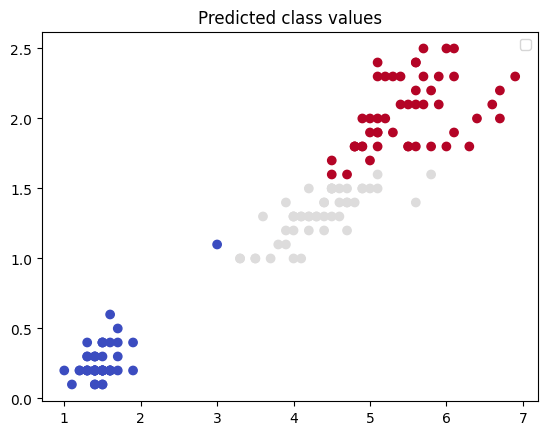

In [161]:
# fitting a simple model: classification
from sklearn import datasets
import pandas as pd
from sklearn.svm import LinearSVC
import matplotlib.pyplot as plt

# get data: iris
iris = datasets.load_iris()
data = pd.DataFrame(iris.data, columns=iris.feature_names)
data['target'] = iris.target

# split data
X = data[['petal length (cm)', 'petal width (cm)']]
y = data['target']

# fit model
model = LinearSVC()
model.fit(X, y)

# predicting
predictions = model.predict(X)

# visualize predictions and actual values
plt.scatter(X['petal length (cm)'], X['petal width (cm)'], c = predictions, cmap=plt.cm.coolwarm)
plt.title("Predicted class values")
plt.legend()
plt.show()


E:\PYTHON\Lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


   MedInc  HouseAge  AveRooms  AveBedrms  Population  AveOccup  Latitude  \
0  8.3252      41.0  6.984127   1.023810       322.0  2.555556     37.88   
1  8.3014      21.0  6.238137   0.971880      2401.0  2.109842     37.86   
2  7.2574      52.0  8.288136   1.073446       496.0  2.802260     37.85   
3  5.6431      52.0  5.817352   1.073059       558.0  2.547945     37.85   
4  3.8462      52.0  6.281853   1.081081       565.0  2.181467     37.85   

   Longitude  MedHouseVal  
0    -122.23        4.526  
1    -122.22        3.585  
2    -122.24        3.521  
3    -122.25        3.413  
4    -122.25        3.422  
(20640, 9)


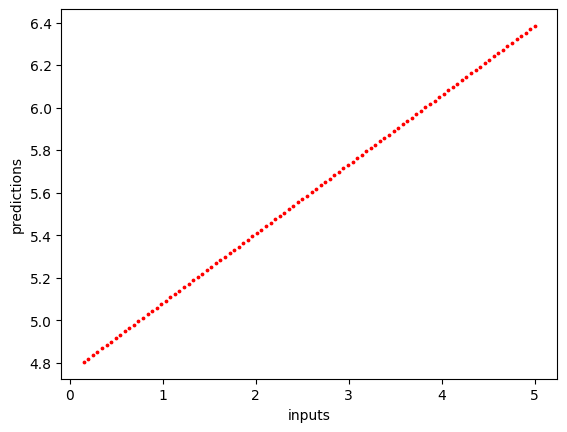

In [162]:
# fitting a simple model: regression
import pandas as pd
from sklearn.datasets import fetch_california_housing
from sklearn import linear_model
import matplotlib.pyplot as plt
# import numpy as np

# get dataset: housing
housing_ = fetch_california_housing(as_frame=True)
housing = pd.DataFrame(housing_.data, columns=housing_.feature_names)
housing['MedHouseVal'] = housing_.target
print(housing.head())
print(housing.shape)

# split data
X = housing[['MedHouseVal']]
y = housing['AveRooms']

# fit a model
model = linear_model.LinearRegression()
model.fit(X, y)

# predicting new inputs
new_inputs = np.array([0.14999   , 0.1989801 , 0.2479702 , 0.2969603 , 0.3459504 ,
                       0.39494051, 0.44393061, 0.49292071, 0.54191081, 0.59090091,
                       0.63989101, 0.68888111, 0.73787121, 0.78686131, 0.83585141,
                       0.88484152, 0.93383162, 0.98282172, 1.03181182, 1.08080192,
                       1.12979202, 1.17878212, 1.22777222, 1.27676232, 1.32575242,
                       1.37474253, 1.42373263, 1.47272273, 1.52171283, 1.57070293,
                       1.61969303, 1.66868313, 1.71767323, 1.76666333, 1.81565343,
                       1.86464354, 1.91363364, 1.96262374, 2.01161384, 2.06060394,
                       2.10959404, 2.15858414, 2.20757424, 2.25656434, 2.30555444,
                       2.35454455, 2.40353465, 2.45252475, 2.50151485, 2.55050495,
                       2.59949505, 2.64848515, 2.69747525, 2.74646535, 2.79545545,
                       2.84444556, 2.89343566, 2.94242576, 2.99141586, 3.04040596,
                       3.08939606, 3.13838616, 3.18737626, 3.23636636, 3.28535646,
                       3.33434657, 3.38333667, 3.43232677, 3.48131687, 3.53030697,
                       3.57929707, 3.62828717, 3.67727727, 3.72626737, 3.77525747,
                       3.82424758, 3.87323768, 3.92222778, 3.97121788, 4.02020798,
                       4.06919808, 4.11818818, 4.16717828, 4.21616838, 4.26515848,
                       4.31414859, 4.36313869, 4.41212879, 4.46111889, 4.51010899,
                       4.55909909, 4.60808919, 4.65707929, 4.70606939, 4.75505949,
                       4.8040496 , 4.8530397 , 4.9020298 , 4.9510199 , 5.00001   ])
predictions = model.predict(new_inputs.reshape([-1, 1]))

# visualize the new inputs and predicted values
plt.scatter(new_inputs, predictions, color='r', s=3)
plt.xlabel('inputs')
plt.ylabel('predictions')
plt.show()


#### 1.3 Machine learning and time series data

* Audio data is a kind of common time series data
* Audio files are usually in '.wav' format
* Use 'glob' function to list all audio files
* Use 'librosa' library to read audio files
* You can generate time array with 'np.linspace(0, final_time, sfreq)' function
* You can convert column type to datetime with 'np.to_datetime()' function

In [163]:
# inspecting the classification data
# get audio files in folder
import h5py
import numpy as np

# read hdf5 file
data = h5py.File('9_datasets/audio.hdf5', 'r')
for key in data.keys():
    print(key)

# get first-level group keys
group = data['h5io']
for key in group.keys():
    print(key)

h5io
key_data
key_meta
key_sfreq


In [164]:
# continue exploring keys and reach to the bottom of 'dataset' level
print(type(group['key_data']))
print(type(group['key_meta']))
print(type(group['key_sfreq']))

print('key_data keys:')
for key in group['key_data'].keys():
    print(key)

print(type(group['key_data']['axis0']))
print(type(group['key_data']['axis1']))
print(type(group['key_data']['block0_items']))
print(type(group['key_data']['block0_values']))


<class 'h5py._hl.group.Group'>
<class 'h5py._hl.group.Group'>
<class 'h5py._hl.dataset.Dataset'>
key_data keys:
axis0
axis1
block0_items
block0_values
<class 'h5py._hl.dataset.Dataset'>
<class 'h5py._hl.dataset.Dataset'>
<class 'h5py._hl.dataset.Dataset'>
<class 'h5py._hl.dataset.Dataset'>


In [165]:
# check dataset
axis0 = np.array(group['key_data']['axis0'])
axis1 = np.array(group['key_data']['axis1'])
block0_items = np.array(group['key_data']['block0_items'])
block0_values = np.array(group['key_data']['block0_values'])
print(axis0[:3])
print(axis1[:3])
print(block0_items[:3])
print(block0_values[:3])


[0 1 2]
[0.         0.00045351 0.00090703]
[0 1 2]
[[-2.46844683e-02 -2.45074201e-02  8.25388916e-03 -9.95218987e-04
   2.80759443e-04 -3.07465885e-02  2.95301457e-03  5.49660949e-03
  -9.50337620e-04  1.38362199e-02  4.33188106e-04  4.41437587e-04
   1.31578860e-03 -6.83065644e-03 -1.18928671e-01 -1.69436156e-03
   2.11255188e-04  4.16483199e-05  1.09218457e-03 -3.90316593e-04
  -3.17522317e-05 -1.68890948e-03 -1.43727124e-01 -1.99273471e-02
   8.86944029e-03 -1.53974555e-02  4.97730616e-05  2.63496884e-03
   8.64871603e-04 -3.81299965e-02 -1.53654383e-03  2.14691064e-03
   1.38526142e-04  9.03067179e-04  2.36877948e-02  5.65361697e-03
  -1.05511183e-02 -1.78760290e-02  3.69064655e-04  2.58310338e-05
   2.74239201e-03  8.84461924e-02  1.03454874e-03  6.17577112e-04
  -3.23610269e-02  1.12690814e-02 -1.31191403e-01 -7.99111202e-02
  -7.84732215e-03 -3.25150555e-03  7.33883679e-02  8.79900623e-03
  -3.61737043e-01 -5.01421629e-04  2.54578441e-02 -1.60920271e-03
  -5.47076529e-03 -3.3713

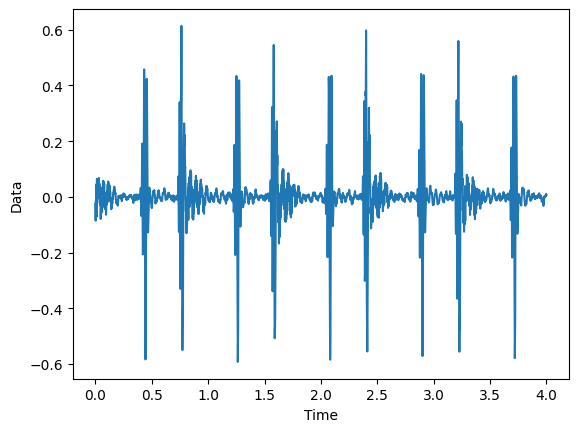

In [166]:
import matplotlib.pyplot as plt

# set variable to time series data and time
values = block0_values
time = axis1

# plot data
plt.plot(time, values[:,:1])
plt.xlabel('Time')
plt.ylabel('Data')
plt.show()

In [167]:
# I comment these code because I don't have these .wav files to work on
# inspecting the classification data

# import librosa as lr
# from glob import glob
# import matplotlib.pyplot as plt

# list all audio files
# audio_files = glob(data_dir + '/*.wav')

# read first audio file
# audio, sfreq = lr.load(audio_file[0])
# time = np.arange(0, len(audio)) / sfreq

# plot audio over time
# fig, ax = plt.subplots()
# ax.plot(time, audio)
# ax.set(xlabel='Time', ylabel='Sound Amplitude')
# plt.show()

In [168]:
# inspecting the regression data
import pandas as pd
# import matplotlib.pyplot as plt

# read in the data
data = pd.read_csv('9_datasets/prices.csv')
print(data.shape)

# subset
data_subset = data[data['symbol'].isin(['AAPL', 'FB','NFLX', 'V', 'XOM'])]
print(data_subset.shape)

# transform to pivot table
data_pivot = pd.pivot_table(data=data_subset, values='close', columns=['symbol'], index=data_subset['date'])
print(data_pivot.shape)

# rename columns
data_pivot.columns = ['AAPL', 'FB', 'NFLX', 'V', 'XOM']

# convert index
data_pivot.index = pd.to_datetime(data_pivot.index)
print(data_pivot.head())

(84912, 4)
(8056, 4)
(1762, 5)
                  AAPL  FB       NFLX          V        XOM
date                                                       
2010-01-04  214.009998 NaN  53.479999  88.139999  69.150002
2010-01-05  214.379993 NaN  51.510001  87.129997  69.419998
2010-01-06  210.969995 NaN  53.319999  85.959999  70.019997
2010-01-07  210.580000 NaN  52.400001  86.760002  69.800003
2010-01-08  211.980005 NaN  53.300002  87.000000  69.519997


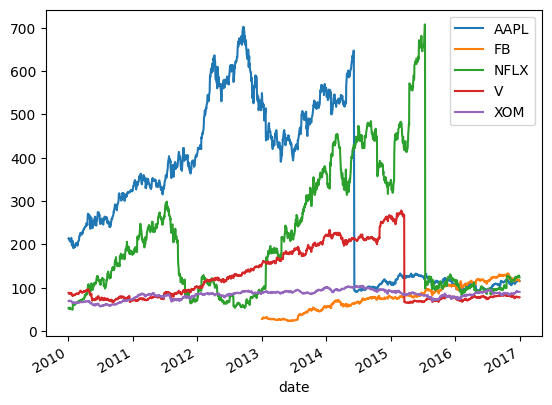

In [169]:
# loop through each column, plot values
fig, ax = plt.subplots()
for column in data_pivot.columns:
    data_pivot[column].plot(ax=ax, label=column)
ax.legend()
plt.show()

### CHAPTER 2. Time Series as Inputs to a Model

#### 2.1 Classifying a time series

* Always visualize your raw data first!
* We need to calculate features from raw time series data
* Thus, we will have a traditional classification dataset from a time series data
* Simple start point: **statistics summary (MIN, MAX, AVG)**
* Then, we can use 'scikit-learn' library to create and fit a classifier

In [170]:
# many repetitions of sounds
import pandas as pd
import h5py
import numpy as np

# get dataframe raw values
# read audio files and get to deepest group level
data = h5py.File('9_datasets/audio.hdf5', 'r')
group = data['h5io']

# read dataset values
axis0 = np.array(group['key_data']['axis0'])
axis1 = np.array(group['key_data']['axis1'])
block0_items = np.array(group['key_data']['block0_items'])
block0_values = np.array(group['key_data']['block0_values'])

# extract values and save into variables
time = axis1
values = block0_values
value_0 = values[:, 0]
value_1 = values[:, 1]
value_2 = values[:, 2]

value_3 = values[:, 3]
value_4 = values[:, 4]
value_6 = values[:, 6]

# make two dataframes 'normal' and 'abnormal'
abnormal = pd.DataFrame({'time':time, '0':value_0, '1':value_1, '2':value_2})
normal = pd.DataFrame({'time':time, '3':value_3, '4':value_4, '6':value_6})

abnormal = abnormal.set_index('time')
normal = normal.set_index('time')
print(abnormal.head())
print(normal.head())

                 0         1         2
time                                  
0.000000 -0.024684 -0.024507  0.008254
0.000454 -0.060429 -0.047736  0.014809
0.000907 -0.070080 -0.039938  0.010475
0.001361 -0.084212 -0.041199  0.010272
0.001814 -0.085111 -0.036050  0.008580
                 3         4         6
time                                  
0.000000 -0.000995  0.000281  0.002953
0.000454 -0.003381  0.000381  0.003034
0.000907 -0.000948  0.000063  0.000292
0.001361 -0.000766  0.000026 -0.005916
0.001814  0.000469 -0.000432 -0.005307


In [171]:
# make function to show the plots
def show_plot_and_make_titles():
    axs[0, 0].set(title="Normal Heartbeats")
    axs[0, 1].set(title="Abnormal Heartbeats")
    plt.tight_layout()
    plt.show()


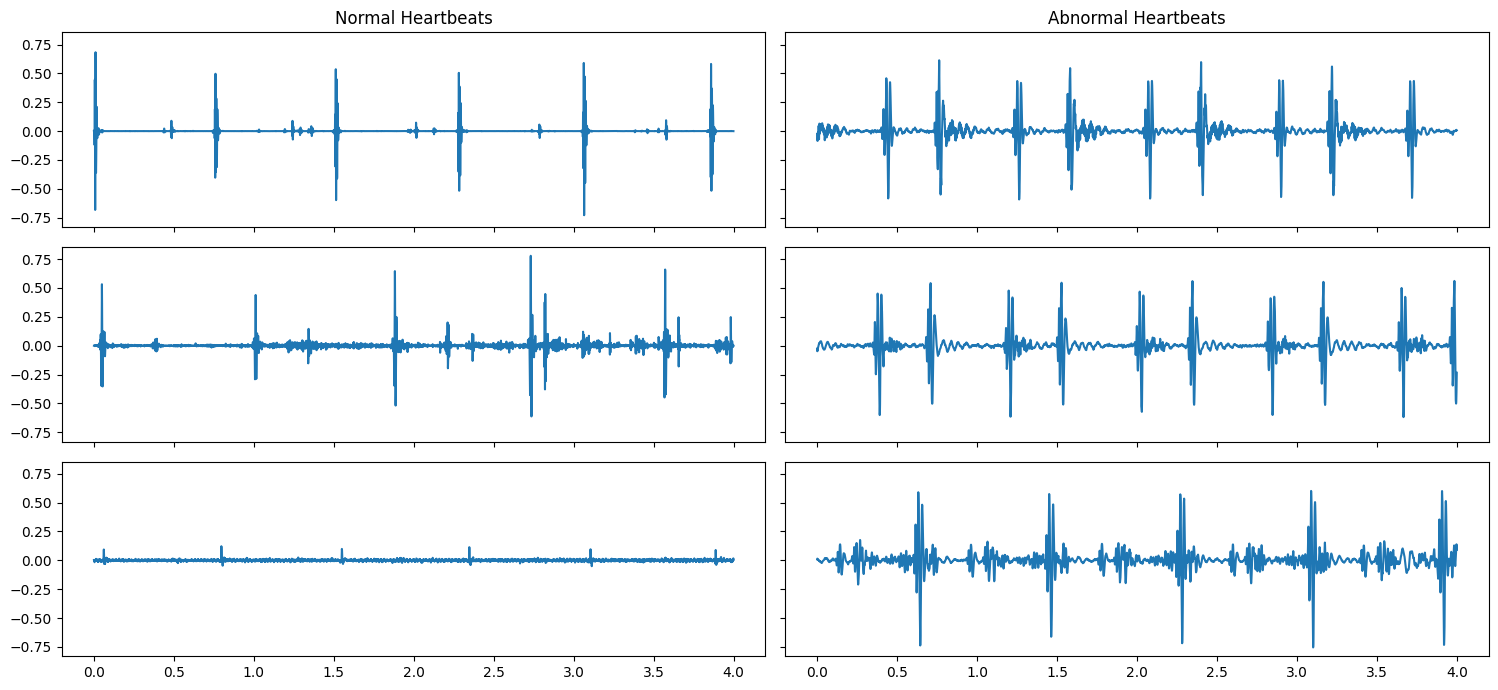

In [172]:
# plot the data
import matplotlib.pyplot as plt
import numpy as np

# make subplots frame
fig, axs = plt.subplots(3, 2, figsize=(15, 7), sharex=True, sharey=True)

# get time array
sfreq = 2205
time = np.arange(0, len(normal)) / sfreq

# stack audio data and then transpose to 1-D array
stacked_audio = np.hstack([normal, abnormal]).T

# plot
for iaudio, ax in zip(stacked_audio, axs.T.ravel()):
    ax.plot(time, iaudio)
show_plot_and_make_titles()


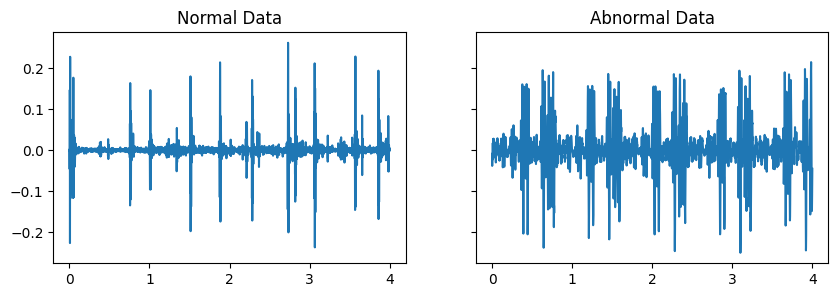

In [173]:
# invariance in time
import numpy as np
import matplotlib.pyplot as plt

# average across the audio files
mean_normal = np.mean(normal, axis=1)
mean_abnormal = np.mean(abnormal, axis=1)

# plot each average over time
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10, 3), sharey=True)
ax1.plot(time, mean_normal)
ax1.set(title="Normal Data")
ax2.plot(time, mean_abnormal)
ax2.set(title="Abnormal Data")
plt.show()

In [174]:
# build a classification model
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.svm import LinearSVC

# get full scales of data into dataframe 'normal' and 'abnormal'
normal_index = [3, 4, 6, 7, 10, 12, 15, 16, 17, 18, 20, 21, 24, 25, 26, 27, 31, 32, 33, 34, 38, 39, 40, 43, 48, 49, 51, 52, 55]
abnormal_index = [0, 1, 2, 5, 8, 9, 11, 13, 14, 19, 22, 23, 28, 29, 30, 35, 36, 37, 41, 42, 44, 45, 46, 47, 50, 53, 54, 56, 57, 58, 59]
print(len(normal_index))
print(len(abnormal_index))

normal_value_array = []
abnormal_value_array = []
normal_columns = []
abnormal_columns = []

for index in normal_index:
    normal_value_array.append(values[:, index])
    normal_columns.append(str(index))

for index in abnormal_index:
    abnormal_value_array.append(values[:, index])
    abnormal_columns.append(str(index))

normal_values = np.transpose(normal_value_array)
abnormal_values = np.transpose(abnormal_value_array)

print(normal_values[:2])
print(normal_columns)
print(type(normal_columns))
print(abnormal_values[:2])
print(abnormal_columns)
print(type(abnormal_columns))

29
31
[[-9.9521899e-04  2.8075944e-04  2.9530146e-03  5.4966095e-03
   4.3318811e-04  1.3157886e-03 -1.6943616e-03  2.1125519e-04
   4.1648320e-05  1.0921846e-03 -3.1752232e-05 -1.6889095e-03
   8.8694403e-03 -1.5397456e-02  4.9773062e-05  2.6349688e-03
   2.1469106e-03  1.3852614e-04  9.0306718e-04  2.3687795e-02
   3.6906466e-04  2.5831034e-05  2.7423920e-03  6.1757711e-04
  -7.8473222e-03 -3.2515055e-03  8.7990062e-03 -3.6173704e-01
  -1.6092027e-03]
 [-3.3807522e-03  3.8078491e-04  3.0335940e-03  1.0088468e-02
   5.5413536e-04 -1.5354565e-04 -2.1566071e-03 -1.9445530e-03
  -1.4639595e-04 -5.5544018e-03  5.8967146e-07 -1.3248170e-03
   8.9640431e-03 -2.6478069e-02 -3.9115712e-05  3.9206482e-03
   5.8872155e-03 -2.2494305e-04  2.5395534e-03  4.6643991e-02
   9.8006427e-04 -6.3321881e-05  2.1613694e-03  4.7593284e-04
  -1.8061381e-02  7.2913431e-03  1.7107001e-02 -6.5184158e-01
  -4.3192212e-03]]
['3', '4', '6', '7', '10', '12', '15', '16', '17', '18', '20', '21', '24', '25', '26', '2

In [175]:
# make dataframe
normal = pd.DataFrame(normal_values, columns=normal_columns, index=time)
abnormal = pd.DataFrame(abnormal_values, columns=abnormal_columns, index=time)
print(normal.head())
print(abnormal.head())
print(normal.shape)
print(abnormal.shape)

                 3         4         6         7        10        12  \
0.000000 -0.000995  0.000281  0.002953  0.005497  0.000433  0.001316   
0.000454 -0.003381  0.000381  0.003034  0.010088  0.000554 -0.000154   
0.000907 -0.000948  0.000063  0.000292  0.008272  0.000232 -0.001945   
0.001361 -0.000766  0.000026 -0.005916  0.009358  0.000538 -0.001429   
0.001814  0.000469 -0.000432 -0.005307  0.009418  0.001081 -0.002623   

                15        16        17        18  ...        34        38  \
0.000000 -0.001694  0.000211  0.000042  0.001092  ...  0.023688  0.000369   
0.000454 -0.002157 -0.001945 -0.000146 -0.005554  ...  0.046644  0.000980   
0.000907  0.000619  0.006148  0.000048 -0.001297  ...  0.039666  0.000765   
0.001361  0.002182 -0.000340  0.001091 -0.002012  ...  0.046120  0.000638   
0.001814  0.004176 -0.003359 -0.000170  0.001939  ...  0.041412  0.000054   

                39        40        43        48        49        51  \
0.000000  0.000026  0.002742  0.

In [176]:
# convert dataframe
normal_convert = normal.transpose()
normal_convert['class'] = 'normal'
abnormal_convert = abnormal.transpose()
abnormal_convert['class'] = 'abnormal'
full_convert = pd.concat([normal_convert, abnormal_convert])

print(normal_convert.head())
print(abnormal_convert.head())
print(full_convert.shape)

         0.0  0.00045351473922902497  0.0009070294784580499  \
3  -0.000995               -0.003381              -0.000948   
4   0.000281                0.000381               0.000063   
6   0.002953                0.003034               0.000292   
7   0.005497                0.010088               0.008272   
10  0.000433                0.000554               0.000232   

    0.0013605442176870747  0.0018140589569160999  0.0022675736961451248  \
3               -0.000766               0.000469               0.001511   
4                0.000026              -0.000432               0.000075   
6               -0.005916              -0.005307              -0.003470   
7                0.009358               0.009418               0.009649   
10               0.000538               0.001081               0.000381   

    0.0027210884353741495  0.0031746031746031746  0.0036281179138321997  \
3                0.007789              -0.000887              -0.091828   
4               -0.0

In [177]:
# split data
X = full_convert.drop('class', axis=1)
y = full_convert['class']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# build model and make predictions
model  = LinearSVC()
model.fit(X_train, y_train)
predictions = model.predict(X_test)
print(sum(predictions == y_test) / len(y_test))

0.6111111111111112


#### 2.2 Improving features for classification

* **Auditory Envelope**:
* Focusing on the general shape of the audio waveform
* In order to do this, we need to calculate the amplitude, and smooth it over time with a *rolling window*
* Then, we can conduct **feature engineering** the envelope

* **Tempogram**:
* Focusing on the tempo of the waveform over time

             value
time              
0.000000 -0.024684
0.000454 -0.060429
0.000907 -0.070080
0.001361 -0.084212
0.001814 -0.085111
2205


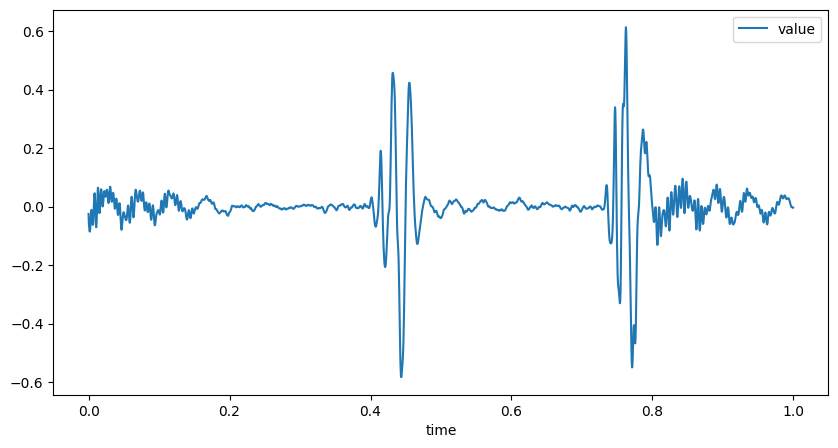

In [178]:
# calculating the envelope of sound
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# get audio data
audio = pd.DataFrame({'time': axis1, 'value': value_0})
audio = audio.set_index('time')
audio = audio.iloc[:2205,:]
print(audio.head())
print(len(audio))

# plot the raw data first
audio.plot(figsize=(10,5))
plt.show()

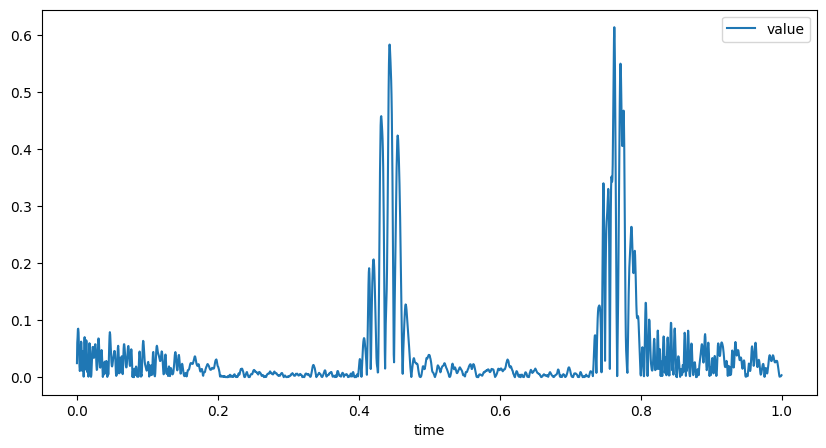

In [179]:
# rectify the audio signal
audio_rectified = audio.apply(np.abs)

# plot the result
audio_rectified.plot(figsize=(10, 5))
plt.show()

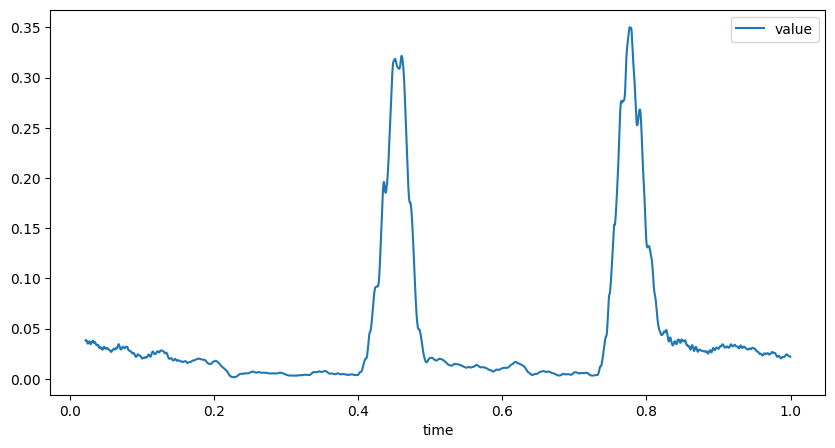

In [180]:
# smooth by applying a rolling mean
audio_rectified_smooth = audio_rectified.rolling(50).mean()

# plot the result
audio_rectified_smooth.plot(figsize=(10, 5))
plt.show()


In [181]:
print(len(audio_rectified_smooth))

2205


In [182]:
# calculating features from the envelope
# calculate envelope for all 60 sound saves
import pandas as pd
import numpy as np
from sklearn.model_selection import cross_val_score

# get the 60 sound waves raw data (60 rows in total)
# combine dataframes 'normal' and 'abnormal' into one
audio = pd.concat([normal, abnormal], axis=1)
print(audio.head())

audio_rectified = audio.apply(np.abs)
audio_rectified_smooth = audio_rectified.rolling(50).mean()

                 3         4         6         7        10        12  \
0.000000 -0.000995  0.000281  0.002953  0.005497  0.000433  0.001316   
0.000454 -0.003381  0.000381  0.003034  0.010088  0.000554 -0.000154   
0.000907 -0.000948  0.000063  0.000292  0.008272  0.000232 -0.001945   
0.001361 -0.000766  0.000026 -0.005916  0.009358  0.000538 -0.001429   
0.001814  0.000469 -0.000432 -0.005307  0.009418  0.001081 -0.002623   

                15        16        17        18  ...        45        46  \
0.000000 -0.001694  0.000211  0.000042  0.001092  ...  0.011269 -0.131191   
0.000454 -0.002157 -0.001945 -0.000146 -0.005554  ...  0.021004 -0.260868   
0.000907  0.000619  0.006148  0.000048 -0.001297  ...  0.017402 -0.224483   
0.001361  0.002182 -0.000340  0.001091 -0.002012  ...  0.019285 -0.238368   
0.001814  0.004176 -0.003359 -0.000170  0.001939  ...  0.017182 -0.215284   

                47        50        53        54        56        57  \
0.000000 -0.079911  0.073388 -0.

In [183]:
# calculate stats
means = np.mean(audio_rectified_smooth, axis=0)
stds = np.std(audio_rectified_smooth, axis=0)
maxs = np.max(audio_rectified_smooth, axis=0)

# # create X and y arrays
labels = full_convert[['class']].to_numpy()

X = np.column_stack([means, stds, maxs])
y = labels.reshape([-1, 1])

print(X)
print(y)

# fit the model and get score
percent_score = cross_val_score(model, X, y, cv=5)
print(percent_score)
print(np.mean(percent_score))



[[0.00803776 0.03164058 0.24943082]
 [0.01602636 0.03359184 0.28992118]
 [0.00519226 0.00319128 0.0277168 ]
 [0.02953012 0.05827377 0.3217972 ]
 [0.00446486 0.00852908 0.03834081]
 [0.00779525 0.01186303 0.13859426]
 [0.03836938 0.05989346 0.26996217]
 [0.00733513 0.01003482 0.07249809]
 [0.0009587  0.00297103 0.0412318 ]
 [0.00869117 0.00679164 0.04508755]
 [0.00128295 0.0041209  0.03417803]
 [0.0140563  0.01755791 0.11556826]
 [0.00685793 0.00780096 0.0634609 ]
 [0.01374334 0.01643459 0.12155181]
 [0.00168918 0.00469773 0.03637446]
 [0.00299758 0.00464594 0.02329937]
 [0.02563171 0.04603735 0.26422961]
 [0.0018326  0.00372465 0.01948485]
 [0.00124721 0.00277674 0.01798531]
 [0.04088449 0.03965533 0.22090677]
 [0.01682764 0.03080363 0.19444591]
 [0.00122269 0.00272168 0.02165299]
 [0.01820436 0.02154413 0.11244557]
 [0.00766106 0.03013048 0.22280851]
 [0.0024377  0.00351598 0.02560532]
 [0.01508713 0.01689354 0.09557459]
 [0.02132238 0.04218739 0.26207528]
 [0.03784088 0.04710566 0.32

E:\PYTHON\Lib\site-packages\sklearn\utils\validation.py:1111: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
E:\PYTHON\Lib\site-packages\sklearn\utils\validation.py:1111: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
E:\PYTHON\Lib\site-packages\sklearn\utils\validation.py:1111: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
E:\PYTHON\Lib\site-packages\sklearn\utils\validation.py:1111: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=Tr

In [184]:
# I commented the following code because the package 'librosa' failed to be installed.

# # derivative features: tempogram
# import librosa as lr
# import numpy as np
#
# # calculate the tempo of the sounds
# tempos = []
# for col, i_audio in audio.items():
#     tempos.append(lr.beat.tempo(i_audio.values, sr=sfreq, hop_length=2**6, aggregate=None))
#
# tempos = np.array(tempos)
# print(tempos)
#
# # calculate statistics about tempos
# tempos_mean = tempos.mean(axis=-1)
# tempos_std = tempos.std(axis=-1)
# tempos_max = tempos.max(axis=-1)
#
# # create X and y arrays adding new tempo statistics
# X = np.column_stack([means, stds, maxs, tempos_mean, tempos_std, tempos_max])
# y = labels.reshape([-1, 1])
#
# # fit the model again
# percent_score = cross_val_score(model, X, y, cv=5)
# print(np.mean(percent_score))


#### 2.3 The spectrogram

**Fourier transforms (FFT):**
* It summarizes timeseries data as a collection of fast- and slow- moving waves
* FFT is a way to tell us how these waves can be combined in different amounts to create our time series

**Spectrograms:**
* A spectrogram is a collection of windowed Fourier transforms over time
* Similar to how a rolling mean was calculated:
    * Choose a window size and shape
    * At a time-point, calculate a FFT for that window
    * Slide the window one by one
    * Aggregate the results
* Called a *Short-Time Fourier Transform* (STFT)
* Then, square each value of STFT to get spectrogram
* We use library 'librosa' to calculate STFT
* Band-widths and centriods of STFT are useful features for model fitting


In [185]:
# I commented the following code because the package 'librosa' failed to be installed.
# # spectrograms of heart beat audio
# from librosa.core import stft
# from librosa.core import amplitude_to_db
# from librosa.display import specshow
# import matplotlib.pyplot as plt
#
# # prepare the STFT
# HOP_LENGTH = 2**4
# spec = stft(audio, hop_length=HOP_LENGTH, n_fft=2**7)
#
# # convert into decibels
# spec_db = amplitude_to_db(spec)
#
# # compare the raw audio and spectrogram of the audio
# fig, axs = plt.subplots(2, 1, figsize=(10, 10), sharex=True)
# axs[0].plot(time, audio)
# specshow(spec_db, sr=sfreq, x_axis='time', y_axis='hz', hop_length=HOP_LENGTH, ax=axs[1])
# plt.show()

In [186]:
# engineering spectral features
# import librosa as lr
#
# # calculate the spectral centroid and bandwidth for the spectrogram
# bandwidths = lr.feature.spectral_bandwidth(S=spec)[0]
# centroids = lr.feature.spectral_centroid(S=spec)[0]
#
# # convert spectrogram to decibels for visualization
# spec_db = amplitude_to_db(spec)
#
# # display these features on top of the spectrogram
# fig, ax = plt.subplots(figsize=(10, 5))
# specshow(spec_db, x_axis='time', y_axis='hz', hop_length=HOP_LENGTH, ax=ax)
# ax.plot(times_spec, centroids)
# ax.fill_between(times_spec, centroids - bandwidths / 2, centroids + bandwidths / 2, alpha=.5)
# ax.set(ylim=[None, 6000])
# plt.show()




In [187]:
# combining features in classifier
# import librosa as lr
# # Loop through each spectrogram
# bandwidths = []
# centroids = []
#
# for spec in spectrograms:
#     # Calculate the mean spectral bandwidth
#     this_mean_bandwidth = np.mean(lr.feature.spectral_bandwidth(S=spec))
#     # Calculate the mean spectral centroid
#     this_mean_centroid = np.mean(lr.feature.spectral_centroid(S=spec))
#     # Collect the values
#     bandwidths.append(this_mean_bandwidth)
#     centroids.append(this_mean_centroid)
#
# # Create X and y arrays
# X = np.column_stack([means, stds, maxs, tempo_mean, tempo_max, tempo_std, bandwidths, centroids])
# y = labels.reshape([-1, 1])
#
# # Fit the model and score on testing data
# percent_score = cross_val_score(model, X, y, cv=5)
# print(np.mean(percent_score))


### CHAPTER 3. Predicting Time Series Data

#### 3.1 Predicting data over time

** Classification VS. Regression:
* Classification: predicts categorical outputs
* Regression: predicts continuous outputs

** Correlation VS. Regression:
* Correlation: A statistic that describes the data (less information than regression)
* Regression: A process that results in a formal "model" of the data

* It is important to visualize how the data changes over time when running regression models with time-series data
* Common two ways of visualizing time series data:
1. Line plot
2. Scatter plot

* The regression model can be constructed in library 'scikit-learn'
* Two common regression model scoring methods:
1. Correlation coefficient ($r$)
2. Coefficient of determination ($R^2$)

In [188]:
# know the dataset

import pandas as pd
import matplotlib.pyplot as plt

# import datasets 'prices'
prices = pd.read_csv('9_datasets/prices.csv')
prices['date'] = pd.to_datetime(prices['date'])
print(prices.shape)
print(prices.info(verbose=True))

# transform dataset
prices_subset = prices[prices['symbol'].isin(['EBAY', 'YHOO'])]
print(prices_subset.shape)

new_prices = prices_subset.pivot_table(values='close', index='date', columns='symbol')
new_prices = new_prices.iloc[:1278, :]
print(new_prices.head())
print(new_prices.shape)

(84912, 4)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 84912 entries, 0 to 84911
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   date    84912 non-null  datetime64[ns]
 1   symbol  84912 non-null  object        
 2   close   84912 non-null  float64       
 3   volume  84912 non-null  float64       
dtypes: datetime64[ns](1), float64(2), object(1)
memory usage: 2.6+ MB
None
(3524, 4)
symbol           EBAY       YHOO
date                            
2010-01-04  23.900000  17.100000
2010-01-05  23.650000  17.230000
2010-01-06  23.500000  17.170000
2010-01-07  23.229998  16.700001
2010-01-08  23.509999  16.700001
(1278, 2)


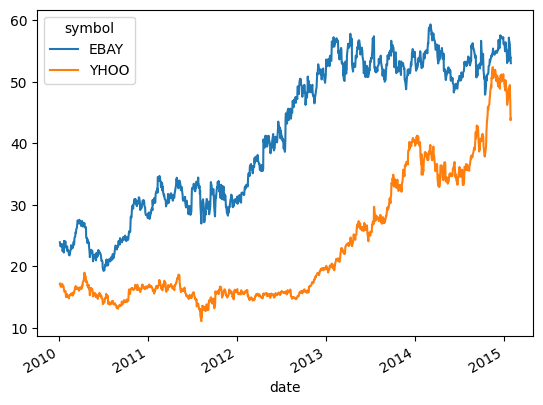

In [189]:
# line plot of raw data values
new_prices.plot()
plt.show()

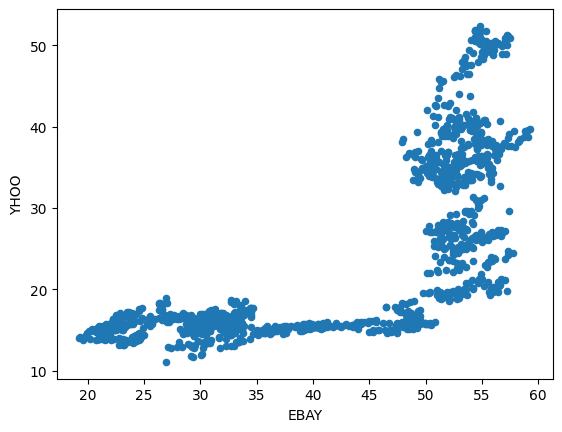

In [190]:
# scatter plot with one company per axis
new_prices.plot.scatter('EBAY', 'YHOO')
plt.show()

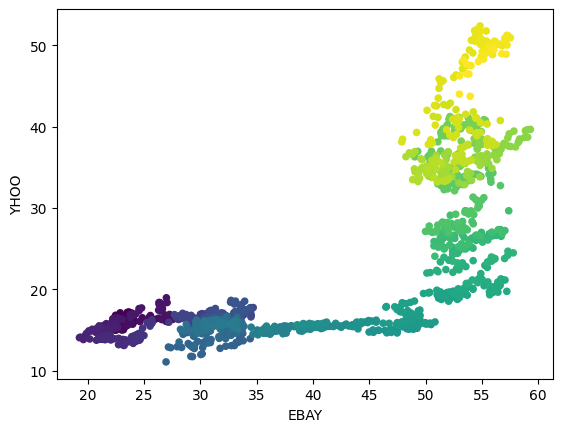

In [191]:
# scatter plot with color relating to time
new_prices.plot.scatter('EBAY', 'YHOO',
                    c=new_prices.index,
                    cmap=plt.cm.viridis,
                    colorbar=False)
plt.show()

In [192]:
# fitting a simple regression model
import pandas as pd
from sklearn.linear_model import Ridge
from sklearn.model_selection import cross_val_score

# get all prices in pivot_table
prices = pd.read_csv('9_datasets/prices.csv')
prices['date'] = pd.to_datetime(prices['date'])
# print(prices.info(verbose=True))

# transform data into pivot_table
all_prices = prices.pivot_table(values='close', index='date', columns='symbol')
all_prices = all_prices.iloc[:1278, :]
print(all_prices.head())
print(all_prices.shape)
print(all_prices.tail())

symbol            AAPL        ABT        AIG   AMAT       ARNC        BAC  \
date                                                                        
2010-01-04  214.009998  54.459951  29.889999  14.30  16.650013  15.690000   
2010-01-05  214.379993  54.019953  29.330000  14.19  16.130013  16.200001   
2010-01-06  210.969995  54.319953  29.139999  14.16  16.970013  16.389999   
2010-01-07  210.580000  54.769952  28.580000  14.01  16.610014  16.930000   
2010-01-08  211.980005  55.049952  29.340000  14.55  17.020014  16.780001   

symbol       BSX     C        CHK      CMCSA  ...       QCOM    RF       SBUX  \
date                                          ...                               
2010-01-04  9.01  3.40  28.090001  16.969999  ...  46.939999  5.42  23.049999   
2010-01-05  9.04  3.53  28.970002  16.740000  ...  48.070000  5.60  23.590000   
2010-01-06  9.16  3.64  28.650002  16.620001  ...  47.599998  5.67  23.420000   
2010-01-07  9.09  3.65  28.720002  16.969999  ...  48.9

In [193]:
missing_values = all_prices.isna().sum()
print(missing_values)

symbol
AAPL        0
ABT         0
AIG         0
AMAT        0
ARNC        0
BAC         0
BSX         0
C           0
CHK         0
CMCSA       0
CSCO        0
DAL         0
EBAY        0
F           0
FB        754
FCX         0
FITB        0
FOXA        0
FTR         0
GE          0
GILD        0
GLW         0
GM        222
HAL         0
HBAN        0
HPE      1278
HPQ         0
INTC        0
JPM         0
KEY         0
KMI       754
KO          0
MRK         0
MRO         0
MSFT        0
MU          0
NFLX        0
NVDA        0
ORCL        0
PFE         0
QCOM        0
RF          0
SBUX        0
T           0
V           0
VZ          0
WFC         0
XOM         0
XRX         0
YHOO        0
dtype: int64


In [194]:
# use stock symbols to extract training data
X = all_prices[['EBAY', 'NVDA', 'YHOO']]
y = all_prices[['AAPL']]

# fit and score model
scores = cross_val_score(estimator=Ridge(), X=X, y=y, cv=3)
print(scores)

[-6.09050633 -0.3179172  -3.72957284]


-5.709399019485149


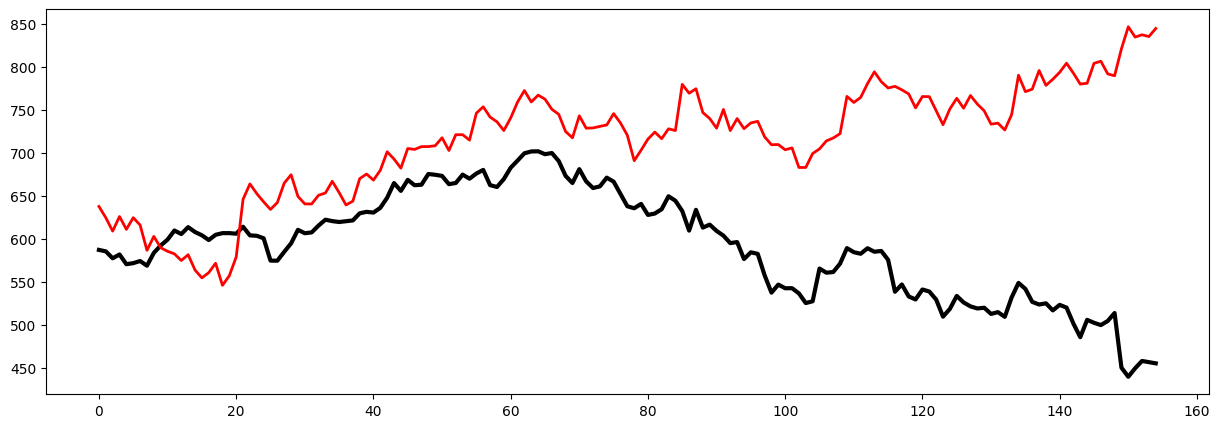

In [195]:
# visualizing predicted values with training/test split model
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score

# split data into training and test sets
all_prices = all_prices.iloc[:775, :]
X = all_prices[['EBAY', 'NVDA', 'YHOO']].to_numpy()
y = all_prices[['AAPL']].to_numpy()
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=.8, shuffle=False, random_state=22)

# fit model and generate predictions
model = Ridge()
model.fit(X_train, y_train)
predictions = model.predict(X_test)
score = r2_score(y_test, predictions)
print(score)

# visualization of predictions
fig, ax = plt.subplots(figsize=(15, 5))
ax.plot(y_test, color='k', lw=3)
ax.plot(predictions, color='r', lw=2)
plt.show()

#### 3.2 Advanced time series prediction

Real-world data issues:
**Data is messy**

* Two common problems are *missing data* and *outliers*
* This often happens because of human error, machine sensor malfunction, database failures, etc
* Visualizing your raw data makes it easier to spot these problems

Dealing with messy data:
Technique 1: **Interpolation** for missing data
* With time series data, you can use time to assist in interpolation
* Interpolation means using *known values* on either side of a gap in the data to make assumptions about what's missing
* use '.interpolate()' method to do this

Technique 2: **Transformation** data
* We use the same rolling window technique covered in Chapter 2
* Using rolling window, we can calculate each point's *percent change over the mean of previous window*
* This technique is also helpful for finding out **outliers**
*

symbol            AAPL       EBAY       NVDA       YHOO
date                                                   
2010-01-04  214.009998  23.900000  18.490000  17.100000
2010-01-05  214.379993  23.650000  18.760000  17.230000
2010-01-06  210.969995  23.500000  18.879999  17.170000
2010-01-07  210.580000  23.229998  18.510000  16.700001
2010-01-08  211.980005  23.509999  18.549999  16.700001


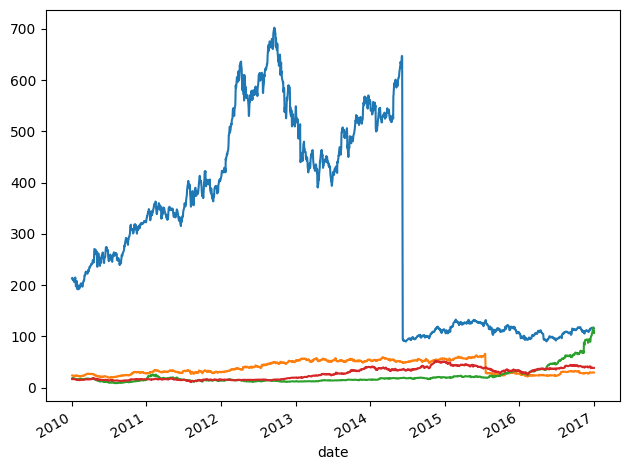

In [196]:
# visualizing messy data
import pandas as pd
import matplotlib.pyplot as plt

# get dataset
prices = pd.read_csv('9_datasets/prices.csv')
prices['date'] = pd.to_datetime(prices['date'])
prices = prices[prices['symbol'].isin(['EBAY', 'NVDA', 'YHOO', 'AAPL'])]
prices = prices.pivot_table(values='close', index='date', columns='symbol')
print(prices.head())

# visualize the dataset
prices.plot(legend=False)
plt.tight_layout()
plt.show()

In [197]:
# count missing values of each series
missing_values = prices.isna().sum()
print(missing_values)

symbol
AAPL    0
EBAY    0
NVDA    0
YHOO    0
dtype: int64


In [198]:
# create a function to interpolate and plot
def interpolate_and_plot(prices, interpolation):

    missing_values = prices.isna()
    prices_interp = prices.interpolate(interpolation)

    fig, ax = plt.subplots(figsize=(10, 5))
    prices_interp.plot(color='k', alpha=.6, ax=ax, legend=False)
    prices_interp[missing_values].plot(ax=ax, color='r', lw=3, legend=False)
    plt.show()


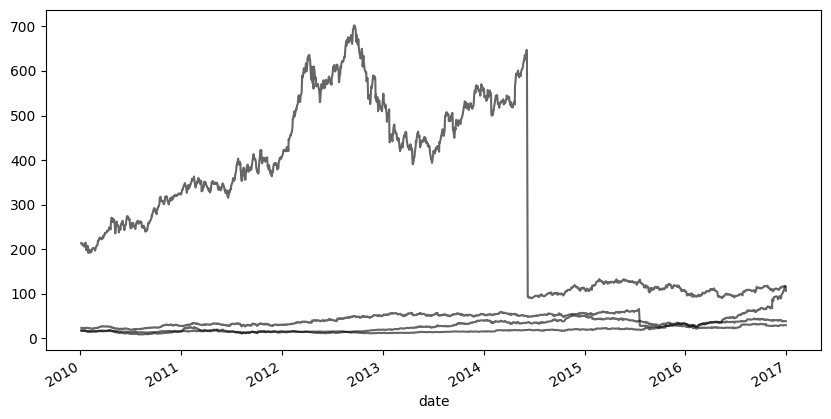

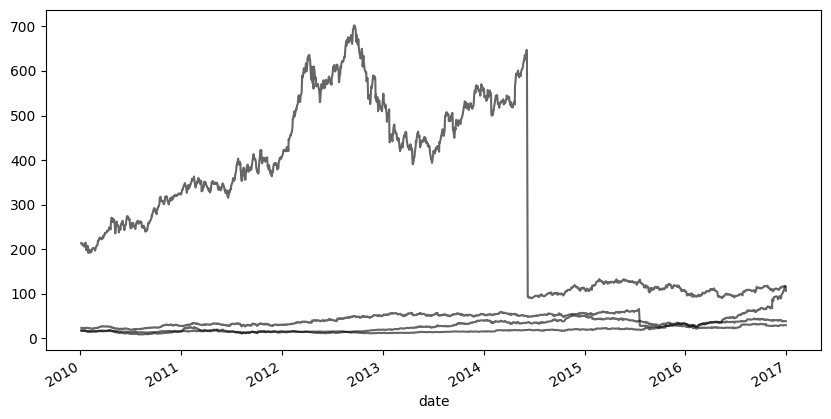

In [199]:
# use function to interpolate
# because our dataset has no missing values, it DOES NOT interpolate

# linear
interpolation_type = 'linear'
interpolate_and_plot(prices, interpolation_type)

# quadratic
interpolation_type = 'quadratic'
interpolate_and_plot(prices, interpolation_type)

In [200]:
# transforming raw data
import numpy as np
# create a function to show percent change
def percent_change(series):
    previous_values = series[:-1]
    last_value = series[-1]

    percent_change = (last_value - np.mean(previous_values)) / np.mean(previous_values)
    return percent_change


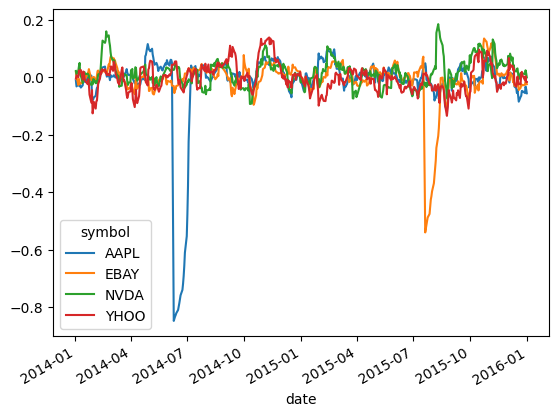

In [201]:
# apply function and plot
prices_perc = prices.rolling(20).aggregate(percent_change)
prices_perc.loc["2014":"2015"].plot()
plt.show()

In [202]:
# handling outliers
# create a function
def replace_outliers(series):
    absolute_differences_from_mean = np.abs(series - np.mean(series))
    this_mask = absolute_differences_from_mean > (np.std(series) * 3)

    series[this_mask] = np.nanmedian(series)
    return series

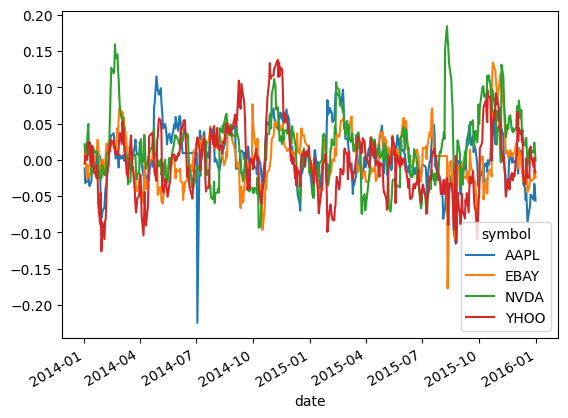

In [203]:
# apply function and plot results
prices_perc = prices_perc.apply(replace_outliers)
prices_perc.loc["2014":"2015"].plot()
plt.show()

#### 3.3 Creating features over time

* **Rolling windows** can be used to extract features
* '.aggregate()' method can be used to calculate many features of a window at once
* 'partial()' function is also useful when using '.aggregate()' method
* 'np.percentile()' function is another useful tool for feature extraction
* Date-based data can also extract some features based on dates, such as year, day, day of the week, etc.

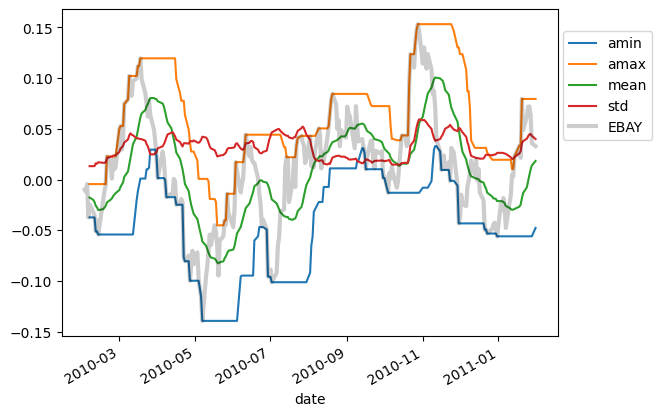

In [204]:
# engineering multiple rolling features at once
# we will use 'prices_perc' dataset created in earlier exercise
import matplotlib.pyplot as plt

# get data
prices_perc_ebay = prices_perc['EBAY']

# define a rolling window and get features
prices_perc_rolling = prices_perc_ebay.rolling(20, min_periods=5, closed='right')
features_to_calculate = [np.min, np.max, np.mean, np.std]
features = prices_perc_rolling.aggregate(features_to_calculate)

# plot
ax = features.loc[:"2011-01"].plot()
prices_perc_ebay.loc[:"2011-01"].plot(ax=ax, color='k', alpha=.2, lw=3)
ax.legend(loc=(1.01, .6))
plt.show()

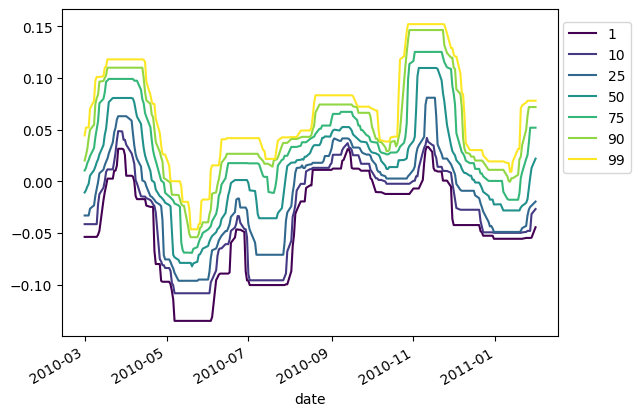

In [205]:
# percentiles and partial functions
from functools import partial
import numpy as np
import matplotlib.pyplot as plt

# get the percentile functions with partial
percentiles = [1, 10, 25, 50, 75, 90, 99]
percentile_functions = [partial(np.percentile, q=percentile) for percentile in percentiles]
prices_perc_rolling = prices_perc_ebay.rolling(20, min_periods=5, closed='right')
features_percentiles = prices_perc_rolling.aggregate(percentile_functions)

# plot
ax = features_percentiles.loc[:"2011-01"].plot(cmap=plt.cm.viridis)
ax.legend(percentiles, loc=(1.01, .5))
plt.show()

In [208]:
# using "date" information
# extract date features from the data, add them as columns
# use 'prices_perc_ebay' as dataset
prices_perc_ebay.index = pd.to_datetime(prices_perc_ebay.index)

prices_perc_ebay['day_of_week'] = prices_perc_ebay.index.weekday
prices_perc_ebay['week_of_year'] = prices_perc_ebay.index.weekofyear
prices_perc_ebay['month_of_year'] = prices_perc_ebay.index.month

print(prices_perc_ebay)


pydev debugger: Unable to find real location for: <string>
pydev debugger: Unable to find real location for: <frozen _collections_abc>
pydev debugger: Unable to find real location for: <frozen os>
pydev debugger: Unable to find real location for: C:\Users\User\AppData\Local\Temp\ipykernel_18000\2918828794.py
pydev debugger: Unable to find real location for: <__array_function__ internals>


ParserError: Unknown string format: day_of_week present at position 1762

In [ ]:
print(prices_perc_ebay.index)



### CHAPTER 4. Validating and Inspecting Time Series Models

#### 4.1 Creating features from the past
*

#### 4.2 Cross-validating time series data
*

#### 4.3 Stationarity and stability
*